## Data Loading, Understanding and Insights

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

In [92]:
df.head()

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career,Recommendation_Score
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist,0.95
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer,0.90
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer,0.88
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,0.93
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager,0.87


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


In [96]:
df.shape

(200, 8)

In [98]:
df.isnull().sum()

CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64

In [100]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

## Data Preprocessing and Feature Engineering (Simulated Feature Scores)

In [102]:
df['Skills'] = df['Skills'].str.replace('\n', '').str.strip()
df['Interests'] = df['Interests'].str.replace('\n', '').str.strip()


In [104]:
df['Skills'] = df['Skills'].str.lower()
df['Interests'] = df['Interests'].str.lower()


In [106]:
df.drop(['CandidateID', 'Age'], axis=1, inplace=True)

In [309]:
def get_programming_score(skills):
    if any(skill in skills for skill in ['python', 'java', 'c++', 'programming', 'software', 'coding']):
        return np.random.randint(8, 10)
    elif any(skill in skills for skill in ['html', 'css', 'ui/ux', 'design', 'javascript']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [110]:
def get_logical_thinking_score(skills, interests):
    keywords = ['data analysis', 'ml', 'machine learning', 'deep learning', 'analytics', 'problem solving']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['design', 'project', 'ui/ux']) or any(k in interests for k in ['business', 'marketing']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)


In [112]:
def get_math_score(skills, interests):
    keywords = ['statistics', 'machine learning', 'mathematics', 'data science', 'algebra']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['html', 'css', 'cloud']) or any(k in interests for k in ['management']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [114]:
def get_problem_solving_score(skills, interests):
    keywords = ['problem solving', 'ml', 'ai', 'analytics', 'debugging']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['python', 'cloud', 'software']) or any(k in interests for k in ['technology']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [116]:
df['programming_skills'] = df['Skills'].apply(get_programming_score)
df['logical_thinking'] = df.apply(lambda row: get_logical_thinking_score(row['Skills'], row['Interests']), axis=1)
df['math_score'] = df.apply(lambda row: get_math_score(row['Skills'], row['Interests']), axis=1)
df['problem_solving'] = df.apply(lambda row: get_problem_solving_score(row['Skills'], row['Interests']), axis=1)

In [118]:
df.head()

,Name,Education,Skills,Interests,Recommended_Career,Recommendation_Score,programming_skills,logical_thinking,math_score,problem_solving
0,John Doe,Bachelor's,python;data analysis;machine learning,technology;data science,Data Scientist,0.95,9,8,9,6
1,Jane Smith,Master's,java;system design;cloud computing,software development;ai,Software Engineer,0.90,8,5,6,8
2,Bob Johnson,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,UX Designer,0.88,6,5,3,3
3,Emily Davis,Bachelor's,python;deep learning;statistics,healthcare;ai,AI Researcher,0.93,8,8,9,9
4,Michael Brown,Master's,project management;communication;agile,business;management,Project Manager,0.87,2,6,5,2


In [120]:
df[['Education', 'Skills', 'Interests', 'programming_skills', 'logical_thinking', 'math_score', 'problem_solving']].head(15)


,Education,Skills,Interests,programming_skills,logical_thinking,math_score,problem_solving
0,Bachelor's,python;data analysis;machine learning,technology;data science,9,8,9,6
1,Master's,java;system design;cloud computing,software development;ai,8,5,6,8
2,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,6,5,3,3
3,Bachelor's,python;deep learning;statistics,healthcare;ai,8,8,9,9
4,Master's,project management;communication;agile,business;management,2,6,5,2
5,Bachelor's,c++;embedded systems;iot,electronics;automation,8,3,2,3
6,Master's,sql;data warehousing;etl,finance;analytics,2,8,3,8
7,Bachelor's,content writing;seo;social media,marketing;communications,3,6,2,2
8,Bachelor's,python;natural language processing;machine lea...,linguistics;technology,8,9,8,6
9,Master's,financial analysis;excel;econometrics,finance;data analysis,3,9,3,2


## Exploratory Data Analysis (EDA)
1. Career Recommendation Frequency
2. Distribution of Simulated Features Scores
3. Correlation Heatmap

In [123]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2660\4081658392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')


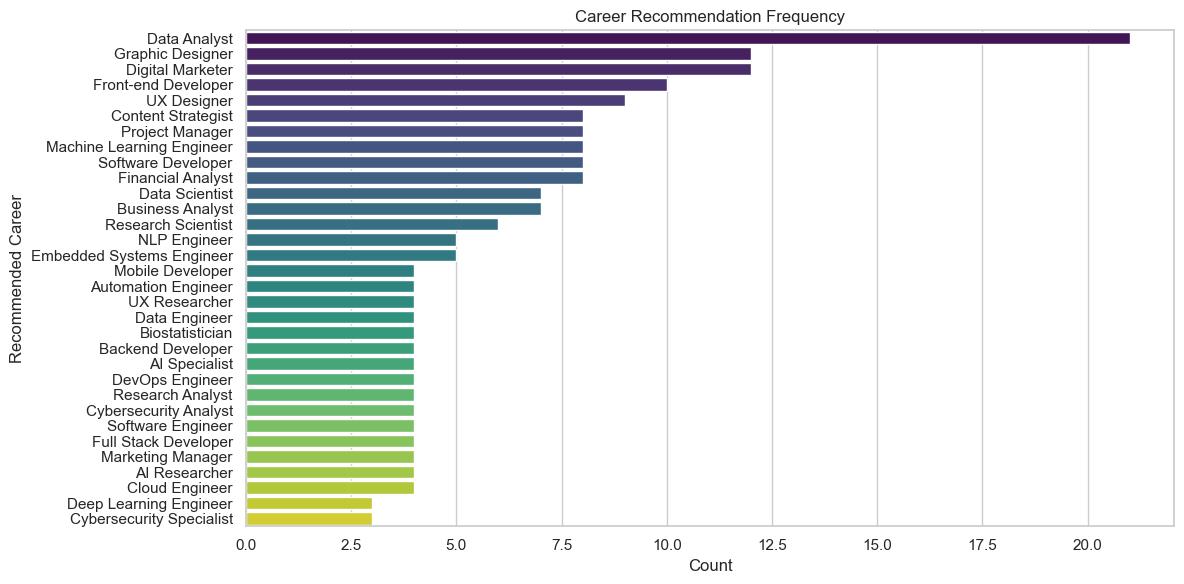

In [141]:
# 1. Distribution of Recommended Careers
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')
plt.title("Career Recommendation Frequency")
plt.xlabel("Count")
plt.ylabel("Recommended Career")
plt.tight_layout()
plt.show()

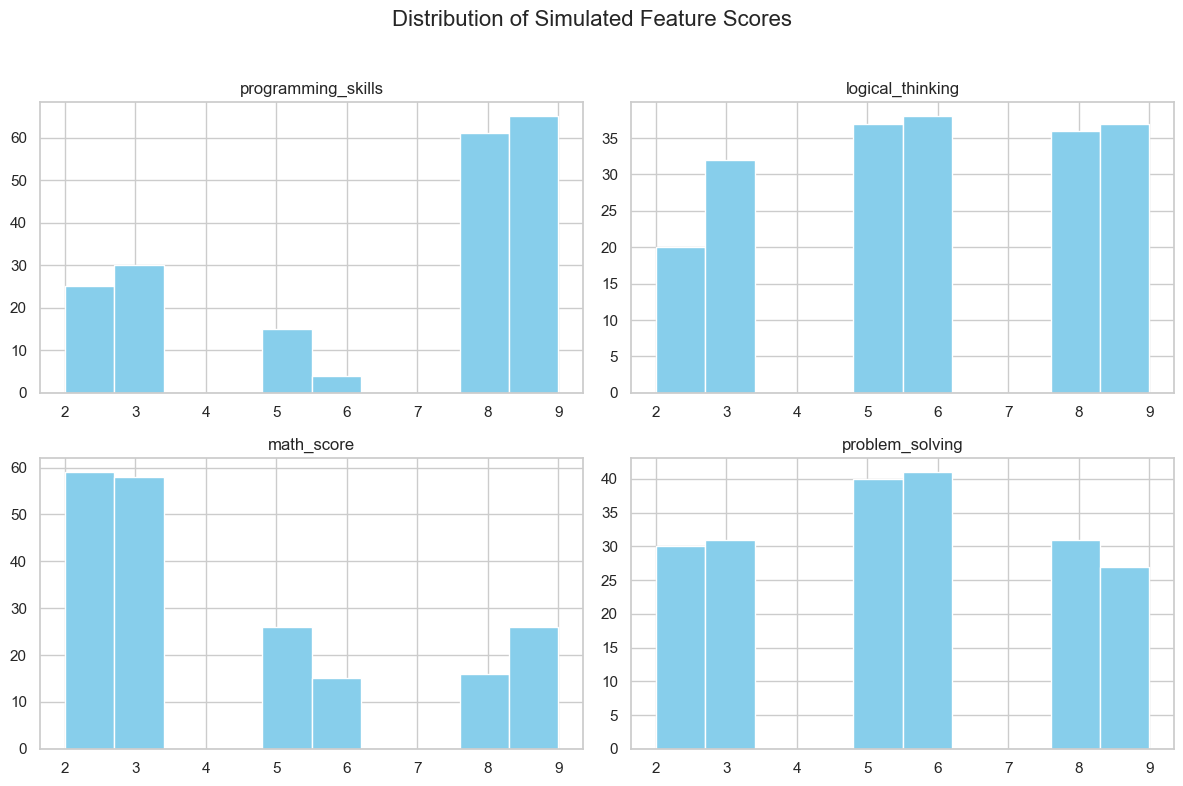

In [129]:
# 2. Histogram of simulated scores
score_columns = ['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']
df[score_columns].hist(bins=10, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle("Distribution of Simulated Feature Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


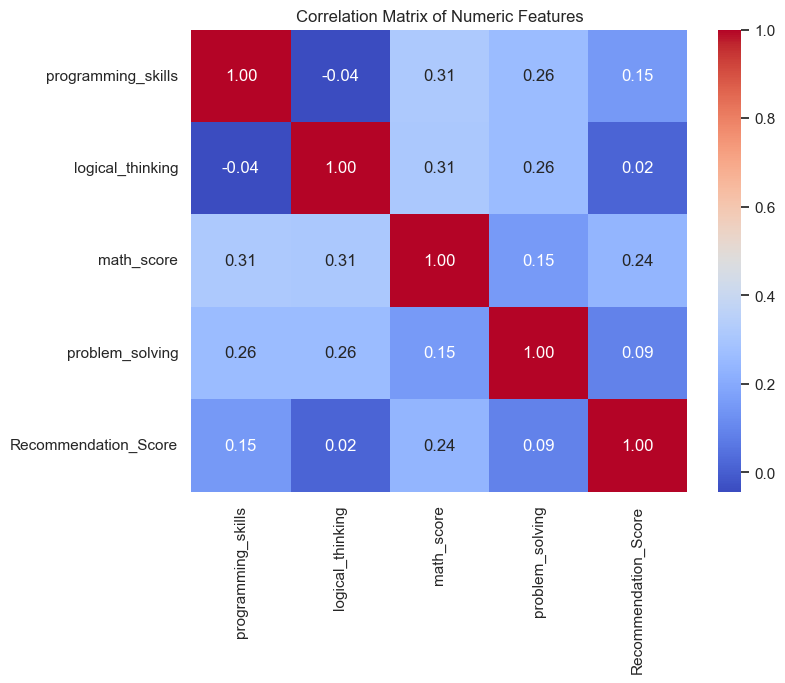

In [131]:
# 3. Correlation heatmap
numeric_features = df[score_columns + ['Recommendation_Score']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [133]:
df.head()

,Name,Education,Skills,Interests,Recommended_Career,Recommendation_Score,programming_skills,logical_thinking,math_score,problem_solving
0,John Doe,Bachelor's,python;data analysis;machine learning,technology;data science,Data Scientist,0.95,9,8,9,6
1,Jane Smith,Master's,java;system design;cloud computing,software development;ai,Software Engineer,0.90,8,5,6,8
2,Bob Johnson,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,UX Designer,0.88,6,5,3,3
3,Emily Davis,Bachelor's,python;deep learning;statistics,healthcare;ai,AI Researcher,0.93,8,8,9,9
4,Michael Brown,Master's,project management;communication;agile,business;management,Project Manager,0.87,2,6,5,2


## Preparing Data for Mode Training

In [135]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Clean and prepare Skills and Interests
df['Skills'] = df['Skills'].str.lower().str.split(';')
df['Interests'] = df['Interests'].str.lower().str.split(';')

# Step 2: Multi-label binarization for Skills and Interests
mlb_skills = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb_skills.fit_transform(df['Skills']), columns=[f"skill_{s}" for s in mlb_skills.classes_])

mlb_interests = MultiLabelBinarizer()
interests_encoded = pd.DataFrame(mlb_interests.fit_transform(df['Interests']), columns=[f"interest_{i}" for i in mlb_interests.classes_])

# Step 3: Combine all feature columns
numerical_features = df[['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']]
X = pd.concat([numerical_features, skills_encoded, interests_encoded], axis=1)

# Step 4: Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['Recommended_Career'])

# Optional: Store mapping for later interpretation
career_labels = dict(zip(le.classes_, le.transform(le.classes_)))

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show result summary
print(f"Total Samples: {df.shape[0]}")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")
print(f"Input Feature Shape: {X.shape}")

Total Samples: 200
Training Samples: 160
Testing Samples: 40
Input Feature Shape: (200, 122)


## Model Selection, Training & Evaluation


 Training and Evaluating: Logistic Regression
 Accuracy: 0.42
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.50      1.00      0.67         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       0.00      0.00      0.00         4
           Data Scientist       0.50      0.50      0.50         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.40      0.57         5
Embedded Systems Engineer       1.00      1.00      1.00         1
        Financial Analyst       1.00     

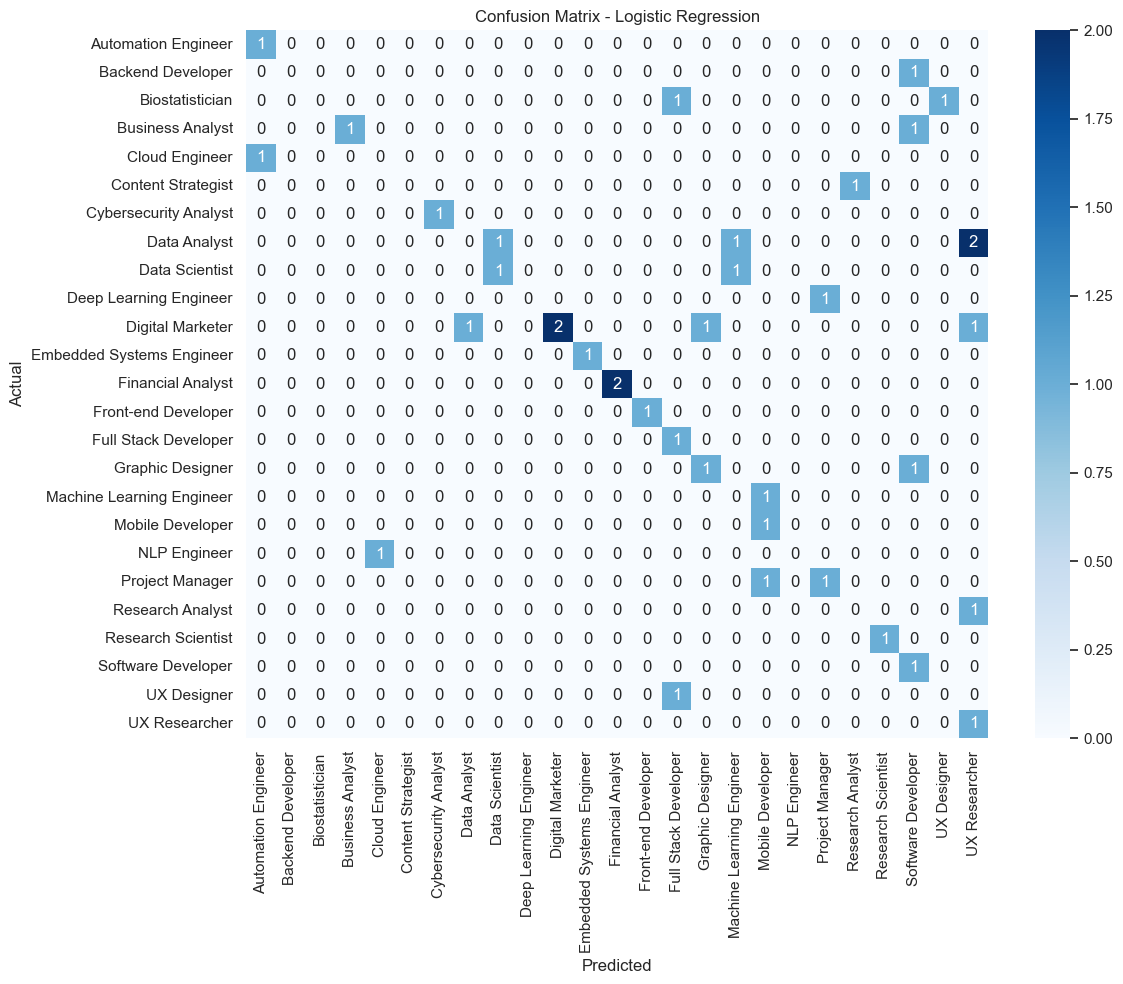


 Training and Evaluating: Random Forest
 Accuracy: 0.47
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.50      1.00      0.67         1
        Backend Developer       1.00      1.00      1.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       0.00      0.00      0.00         4
           Data Scientist       1.00      0.50      0.67         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       0.60      0.60      0.60         5
Embedded Systems Engineer       1.00      1.00      1.00         1
        Financial Analyst       0.67      1.00 

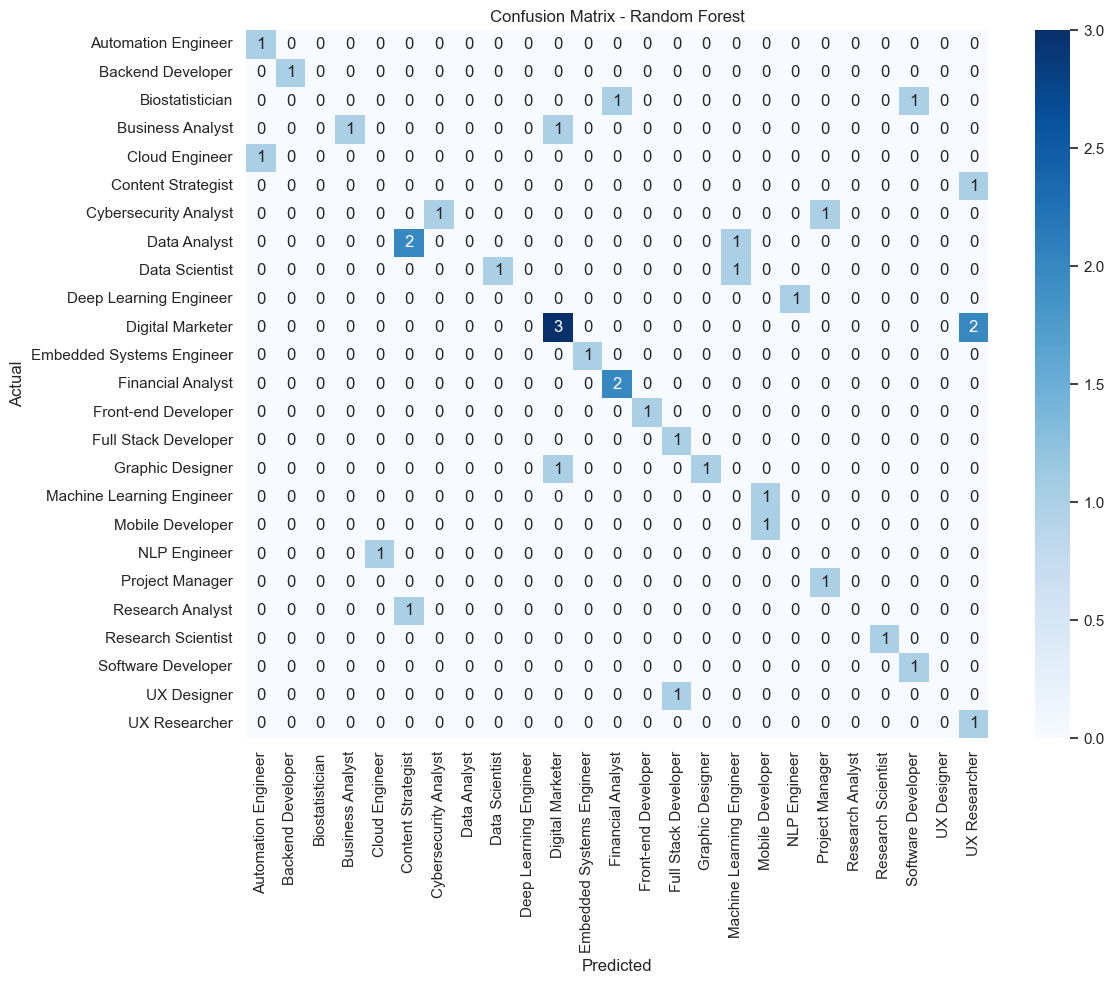


 Training and Evaluating: Naive Bayes
 Accuracy: 0.15
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       0.00      0.00      0.00         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       0.00      0.00      0.00         3
             Data Analyst       0.12      0.75      0.20         4
           Data Scientist       0.00      0.00      0.00         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.20      0.33         5
Embedded Systems Engineer       0.00      0.00      0.00         1
        Financial Analyst       0.00      0.00   

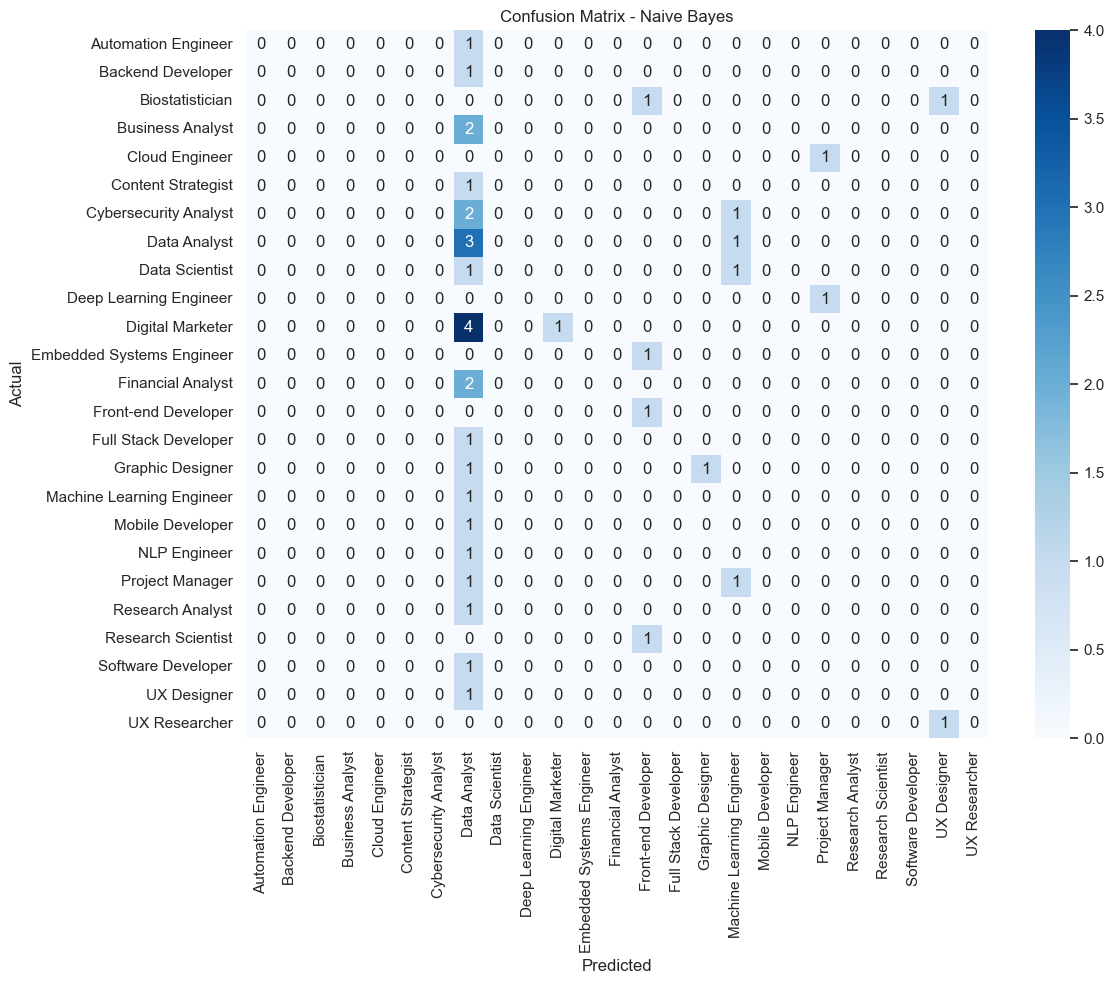


 Training and Evaluating: K-Nearest Neighbors
 Accuracy: 0.23
 Classification Report:
                           precision    recall  f1-score   support

      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       0.50      0.50      0.50         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       0.00      0.00      0.00         3
             Data Analyst       0.33      0.25      0.29         4
           Data Scientist       0.00      0.00      0.00         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.20      0.33         5
Embedded Systems Engineer       0.33      1.00      0.50         1
        Financial Analyst       0.00     

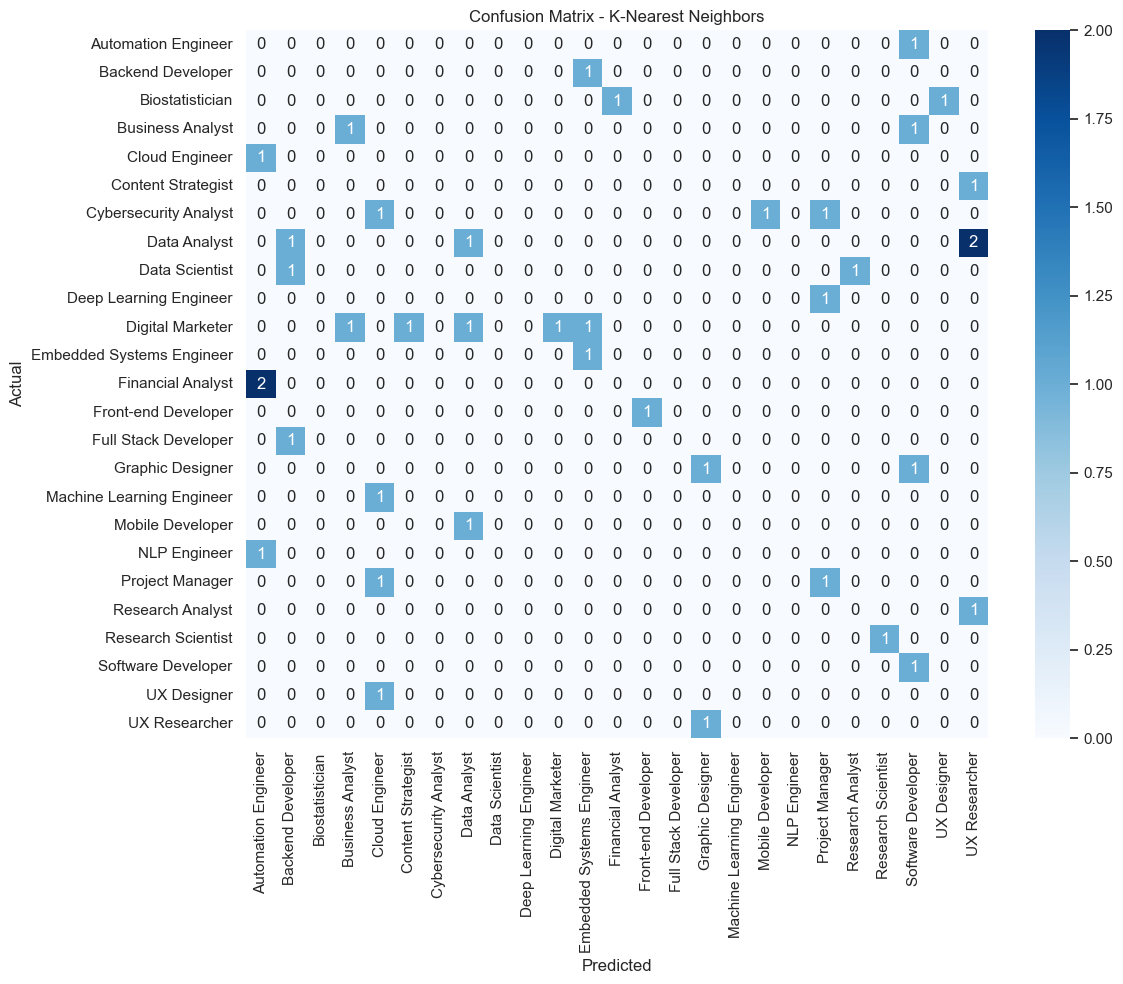


 Best Performing Model: Random Forest with Accuracy = 0.47


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Variable to store best model instance
best_model_instance = None
best_model_name = None

for name, model in models.items():
    print(f"\n Training and Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Update best model
    if best_model_instance is None or acc > results.get(best_model_name, 0):
        best_model_name = name
        best_model_instance = model

    print(f" Accuracy: {acc:.2f}")

    # Get only the labels actually present in y_test
    labels_present = np.unique(y_test)
    target_names_present = le.inverse_transform(labels_present)

    print(" Classification Report:")
    print(classification_report(
        y_test, y_pred,
        labels=labels_present,
        target_names=target_names_present,
        zero_division=0
    ))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels_present)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_present, yticklabels=target_names_present)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Final best model info
print(f"\n Best Performing Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


## Saving the Best Model (Logistic Regression) & Label Encoder 

In [145]:
df['Input'] = df['Skills'].astype(str) + " " + df['Interests'].astype(str)


In [147]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Input'])
y = le.fit_transform(df['Recommended_Career'])


In [149]:
import joblib

In [151]:
# Step: Save the best model (Logistic Regression)
joblib.dump(models["Logistic Regression"], 'career_prediction_model.pkl')

# Step: Save the TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Step: Save the Label Encoder
joblib.dump(le, 'label_encoder.pkl')

print(" Model, Vectorizer, and Label Encoder saved successfully!")

 Model, Vectorizer, and Label Encoder saved successfully!


## Career Roadmaps (Hardcoded for Each Predicted Career)
This dictionary contains detailed skill progression paths (Basic → Mastery) for each career the model can predict.


In [403]:
career_roadmaps = {
    "AI Researcher": {
        "Basic": [
            "Learn Python basics",
            "Understand Linear Algebra & Statistics",
            "Complete beginner ML course"
        ],
        "Intermediate": [
            "Build ML projects using Scikit-learn/TensorFlow",
            "Read key research papers (e.g., on arXiv)",
            "Explore datasets like Kaggle, UCI"
        ],
        "Advanced": [
            "Specialize in NLP, Computer Vision, etc.",
            "Write your own research papers",
            "Start publishing on Medium or GitHub"
        ],
        "Mastery": [
            "Pursue PhD or join top AI labs",
            "Lead teams in AI research",
            "Contribute to cutting-edge innovations"
        ]
    },
    "AI Specialist": {
        "Basic": [
            "Master Python and ML libraries",
            "Understand core ML concepts",
            "Complete introductory AI courses"
        ],
        "Intermediate": [
            "Apply AI in real-world projects",
            "Work with TensorFlow/PyTorch",
            "Understand AI ethics and safety"
        ],
        "Advanced": [
            "Explore subfields like Reinforcement Learning",
            "Publish technical articles or tutorials",
            "Contribute to open-source AI projects"
        ],
        "Mastery": [
            "Lead enterprise-level AI deployments",
            "Speak at conferences or tech forums",
            "Invent new AI frameworks or tools"
        ]
    },
    "Data Analyst": {
        "Basic": [
            "Learn Excel, SQL, and basic Python",
            "Understand statistics and data types",
            "Build simple dashboards (e.g., in Tableau)"
        ],
        "Intermediate": [
            "Perform exploratory data analysis (EDA)",
            "Work with Pandas, NumPy, Matplotlib",
            "Clean and preprocess real-world data"
        ],
        "Advanced": [
            "Use Power BI/Tableau for interactive dashboards",
            "Automate reports using Python",
            "Implement regression and classification models"
        ],
        "Mastery": [
            "Master business intelligence tools",
            "Guide data-driven decisions in businesses",
            "Mentor aspiring analysts"
        ]
    },
    "Data Scientist": {
        "Basic": [
            "Master Python, R, and SQL",
            "Understand statistical modeling",
            "Explore basic ML techniques"
        ],
        "Intermediate": [
            "Perform feature engineering and model evaluation",
            "Use Scikit-learn, TensorFlow, or PyTorch",
            "Participate in Kaggle competitions"
        ],
        "Advanced": [
            "Apply ML to business problems",
            "Develop and deploy predictive models",
            "Work with large datasets and cloud platforms"
        ],
        "Mastery": [
            "Lead data science teams",
            "Drive strategy with data",
            "Research and innovate new ML models"
        ]
    },
    "Software Engineer": {
        "Basic": [
            "Learn a programming language (Python, C++, Java)",
            "Understand data structures and algorithms",
            "Build basic software projects"
        ],
        "Intermediate": [
            "Work with version control (Git)",
            "Learn software design principles",
            "Develop and test real-world applications"
        ],
        "Advanced": [
            "Design scalable and maintainable systems",
            "Master CI/CD pipelines and DevOps practices",
            "Contribute to large codebases"
        ],
        "Mastery": [
            "Lead software engineering teams",
            "Architect enterprise systems",
            "Drive software development best practices"
        ]
    },
    "Machine Learning Engineer": {
        "Basic": [
            "Learn Python and ML libraries (Scikit-learn, Pandas)",
            "Understand supervised and unsupervised learning",
            "Complete beginner ML projects"
        ],
        "Intermediate": [
            "Tune models and understand cross-validation",
            "Build and evaluate pipelines",
            "Understand deep learning basics (ANNs, CNNs)"
        ],
        "Advanced": [
            "Deploy models with Flask or FastAPI",
            "Use cloud ML platforms (AWS SageMaker, GCP AI)",
            "Optimize models and handle big data"
        ],
        "Mastery": [
            "Design scalable ML systems",
            "Lead ML engineering projects",
            "Contribute to ML frameworks or research"
        ]
    },
    "Front-end Developer": {
        "Basic": [
            "Learn HTML, CSS, and JavaScript",
            "Understand responsive web design",
            "Build simple web pages and forms"
        ],
        "Intermediate": [
            "Master React, Vue, or Angular",
            "Implement routing, components, and state management",
            "Consume REST APIs and handle data"
        ],
        "Advanced": [
            "Optimize frontend performance",
            "Handle accessibility and cross-browser support",
            "Work on large frontend architectures"
        ],
        "Mastery": [
            "Lead frontend engineering teams",
            "Architect scalable design systems",
            "Mentor junior developers and set best practices"
        ]
    },
    "Backend Developer": {
        "Basic": [
            "Learn a backend language (Python, Node.js, Java)",
            "Understand server-client communication",
            "Build RESTful APIs with Flask, Express, etc."
        ],
        "Intermediate": [
            "Work with databases (SQL, NoSQL)",
            "Implement authentication and middleware",
            "Understand MVC architecture"
        ],
        "Advanced": [
            "Implement caching, message queues, and security",
            "Integrate microservices and APIs",
            "Use containerization (Docker, Kubernetes)"
        ],
        "Mastery": [
            "Design scalable backend infrastructure",
            "Lead backend development efforts",
            "Optimize system for performance and scalability"
        ]
    },
    "UX Designer": {
        "Basic": [
            "Learn UX principles and design thinking",
            "Use wireframing tools (Figma, Adobe XD)",
            "Understand user research basics"
        ],
        "Intermediate": [
            "Conduct usability testing",
            "Build interactive prototypes",
            "Design with accessibility in mind"
        ],
        "Advanced": [
            "Design end-to-end user journeys",
            "Work closely with product and engineering",
            "Incorporate data-driven design decisions"
        ],
        "Mastery": [
            "Lead UX teams",
            "Set organization-wide design standards",
            "Drive innovation in user experience"
        ]
    },
    "Full Stack Developer": {
        "Basic": [
            "Learn HTML, CSS, JS, and a backend language",
            "Understand REST APIs and basic databases",
            "Build simple full stack applications"
        ],
        "Intermediate": [
            "Work with frameworks (React + Node.js/Django)",
            "Handle routing, auth, and deployment",
            "Master Git and collaborative workflows"
        ],
        "Advanced": [
            "Build scalable full stack projects",
            "Use Docker, CI/CD, and testing tools",
            "Implement advanced database interactions"
        ],
        "Mastery": [
            "Lead full stack teams",
            "Architect end-to-end systems",
            "Mentor and conduct code reviews"
        ]
    },
    "UX Researcher": {
        "Basic": [
            "Learn research methodologies and design thinking",
            "Conduct user interviews and surveys",
            "Analyze qualitative data"
        ],
        "Intermediate": [
            "Perform usability testing",
            "Use tools like Hotjar, Google Analytics",
            "Collaborate with designers and developers"
        ],
        "Advanced": [
            "Design large-scale research studies",
            "Use A/B testing and heatmaps",
            "Present findings to stakeholders"
        ],
        "Mastery": [
            "Lead research initiatives",
            "Shape product strategy with insights",
            "Mentor junior researchers"
        ]
    },
    "Content Strategist": {
        "Basic": [
            "Understand content marketing principles",
            "Learn SEO basics and tools",
            "Write and edit engaging copy"
        ],
        "Intermediate": [
            "Create content calendars",
            "Use tools like SEMrush, Ahrefs, Google Analytics",
            "Collaborate with designers and marketers"
        ],
        "Advanced": [
            "Plan multichannel content campaigns",
            "Conduct content audits and optimization",
            "Manage editorial teams"
        ],
        "Mastery": [
            "Develop brand voice and content frameworks",
            "Lead strategy across platforms",
            "Establish thought leadership"
        ]
    },
    "Project Manager": {
        "Basic": [
            "Learn project management fundamentals",
            "Understand Agile and Waterfall methodologies",
            "Use tools like Trello, Asana, Jira"
        ],
        "Intermediate": [
            "Manage timelines, budgets, and risks",
            "Lead small teams",
            "Document requirements and deliverables"
        ],
        "Advanced": [
            "Run complex projects and stakeholder management",
            "Track KPIs and project outcomes",
            "Facilitate cross-team collaboration"
        ],
        "Mastery": [
            "Lead project portfolios or programs",
            "Train and mentor PMs",
            "Contribute to organizational strategy"
        ]
    },
    "DevOps Engineer": {
        "Basic": [
            "Learn Linux, Git, and shell scripting",
            "Understand CI/CD pipelines",
            "Work with cloud platforms (AWS, Azure)"
        ],
        "Intermediate": [
            "Use Docker and Kubernetes",
            "Automate infrastructure with Terraform or Ansible",
            "Monitor systems with Prometheus/Grafana"
        ],
        "Advanced": [
            "Implement scalable deployment strategies",
            "Improve system reliability and observability",
            "Handle security and compliance in DevOps"
        ],
        "Mastery": [
            "Architect DevOps processes across teams",
            "Optimize delivery cycles",
            "Lead DevOps transformation initiatives"
        ]
    },
    "Graphic Designer": {
        "Basic": [
            "Learn design principles (typography, color, layout)",
            "Master Adobe Photoshop and Illustrator",
            "Understand branding basics"
        ],
        "Intermediate": [
            "Design logos, brochures, web graphics",
            "Work with Figma or Sketch for UI/UX elements",
            "Develop a strong portfolio"
        ],
        "Advanced": [
            "Create complex visual identities for brands",
            "Specialize in UI/UX, motion graphics, or print design",
            "Manage design projects from concept to completion"
        ],
        "Mastery": [
            "Lead creative teams or design departments",
            "Set visual strategy for organizations",
            "Innovate in design trends and technologies"
        ]
    },
    "Digital Marketer": {
        "Basic": [
            "Understand marketing fundamentals and digital channels",
            "Learn SEO, SEM, and social media basics",
            "Analyze basic website analytics"
        ],
        "Intermediate": [
            "Manage PPC campaigns (Google Ads, Facebook Ads)",
            "Implement email marketing strategies",
            "Conduct content marketing and keyword research"
        ],
        "Advanced": [
            "Develop comprehensive digital marketing strategies",
            "Optimize conversion funnels and user journeys",
            "Utilize advanced analytics (Google Analytics 4)"
        ],
        "Mastery": [
            "Lead digital marketing departments",
            "Drive omni-channel marketing initiatives",
            "Set brand's digital presence and growth strategy"
        ]
    },
    "Financial Analyst": {
        "Basic": [
            "Understand financial statements (P&L, Balance Sheet, Cash Flow)",
            "Learn Excel for financial modeling",
            "Grasp basic investment concepts"
        ],
        "Intermediate": [
            "Perform valuation (DCF, multiples)",
            "Analyze market trends and economic indicators",
            "Use financial software (e.g., Bloomberg Terminal basics)"
        ],
        "Advanced": [
            "Develop complex financial models for forecasting",
            "Conduct M&A analysis and due diligence",
            "Present financial insights to stakeholders"
        ],
        "Mastery": [
            "Lead financial planning and strategy",
            "Manage investment portfolios",
            "Advise on corporate finance decisions"
        ]
    },
    "Business Analyst": {
        "Basic": [
            "Understand business processes and requirements gathering",
            "Learn data modeling basics and SQL",
            "Master flowcharting and process mapping"
        ],
        "Intermediate": [
            "Conduct stakeholder interviews and workshops",
            "Create detailed functional and non-functional requirements",
            "Use tools like Jira or Azure DevOps for backlog management"
        ],
        "Advanced": [
            "Lead business process re-engineering efforts",
            "Perform root cause analysis and solution design",
            "Bridge communication between business and technical teams"
        ],
        "Mastery": [
            "Define organizational business strategies",
            "Lead large-scale transformation projects",
            "Mentor junior business analysts"
        ]
    },
    "Research Scientist": {
        "Basic": [
            "Master scientific method and literature review",
            "Develop strong quantitative and analytical skills",
            "Learn data analysis tools (Python/R)"
        ],
        "Intermediate": [
            "Design and conduct experiments",
            "Analyze complex datasets and interpret findings",
            "Write and present research papers/posters"
        ],
        "Advanced": [
            "Lead independent research projects",
            "Secure research grants and funding",
            "Publish in peer-reviewed journals"
        ],
        "Mastery": [
            "Establish a research lab or program",
            "Become a thought leader in their field",
            "Innovate and contribute groundbreaking discoveries"
        ]
    },
    "NLP Engineer": {
        "Basic": [
            "Learn Python and NLTK/spaCy",
            "Understand text preprocessing techniques (tokenization, stemming)",
            "Grasp basic NLP concepts (Bag-of-Words, TF-IDF)"
        ],
        "Intermediate": [
            "Work with advanced NLP models (Word2Vec, GloVe)",
            "Build text classification, sentiment analysis, NER systems",
            "Use deep learning frameworks (TensorFlow/PyTorch) for NLP"
        ],
        "Advanced": [
            "Develop and deploy transformer models (BERT, GPT)",
            "Implement speech-to-text or text generation systems",
            "Optimize NLP models for production environments"
        ],
        "Mastery": [
            "Design and build scalable NLP platforms",
            "Lead NLP research and development teams",
            "Innovate new NLP algorithms or applications"
        ]
    },
    "Embedded Systems Engineer": {
        "Basic": [
            "Learn C/C++ programming for microcontrollers",
            "Understand digital logic and basic electronics",
            "Work with Arduino or Raspberry Pi"
        ],
        "Intermediate": [
            "Develop firmware for embedded devices",
            "Understand real-time operating systems (RTOS)",
            "Work with communication protocols (SPI, I2C, UART)"
        ],
        "Advanced": [
            "Design complex embedded systems (hardware/software co-design)",
            "Debug and optimize embedded code for performance/power",
            "Implement low-level drivers and custom hardware interfaces"
        ],
        "Mastery": [
            "Architect complete embedded solutions for products",
            "Lead embedded software/hardware teams",
            "Innovate in IoT or specialized embedded domains"
        ]
    },
    "Mobile Developer": {
        "Basic": [
            "Learn Swift/Kotlin (iOS/Android) or a cross-platform framework (React Native, Flutter)",
            "Understand UI/UX principles for mobile",
            "Build simple mobile apps (e.g., calculator, to-do list)"
        ],
        "Intermediate": [
            "Implement data persistence (SQLite, Core Data, Room)",
            "Integrate APIs and push notifications",
            "Handle user authentication and payment gateways"
        ],
        "Advanced": [
            "Optimize app performance and battery usage",
            "Implement complex animations and custom UI components",
            "Manage app store deployment and continuous integration"
        ],
        "Mastery": [
            "Lead mobile development teams",
            "Architect scalable mobile applications",
            "Drive mobile innovation and user experience"
        ]
    },
    "Automation Engineer": {
        "Basic": [
            "Learn programming (Python preferred) and scripting",
            "Understand control systems and industrial automation basics",
            "Work with PLCs or robotic simulation software"
        ],
        "Intermediate": [
            "Design and implement automation sequences",
            "Configure industrial sensors and actuators",
            "Troubleshoot automation systems"
        ],
        "Advanced": [
            "Integrate automation systems with IT infrastructure",
            "Develop HMI/SCADA interfaces",
            "Implement advanced robotics and machine vision systems"
        ],
        "Mastery": [
            "Lead automation projects in manufacturing or industry",
            "Design next-generation automated factories",
            "Innovate in robotics and industrial AI"
        ]
    },
    "Data Engineer": {
        "Basic": [
            "Learn SQL and Python for data manipulation",
            "Understand database concepts (relational, NoSQL)",
            "Grasp ETL/ELT principles"
        ],
        "Intermediate": [
            "Work with big data technologies (Hadoop, Spark)",
            "Build and maintain data pipelines (Airflow, DBT)",
            "Use cloud data platforms (AWS Redshift, GCP BigQuery)"
        ],
        "Advanced": [
            "Design scalable data warehouses and data lakes",
            "Implement data governance and security practices",
            "Optimize data processing workflows for performance"
        ],
        "Mastery": [
            "Architect enterprise-level data infrastructure",
            "Lead data engineering teams",
            "Drive data strategy and innovation"
        ]
    },
    "Biostatistician": {
        "Basic": [
            "Master statistical theory and research methods",
            "Learn R or SAS for statistical analysis",
            "Understand biological/medical terminology"
        ],
        "Intermediate": [
            "Design clinical trials and epidemiological studies",
            "Perform advanced statistical modeling (regression, survival analysis)",
            "Interpret and present complex statistical findings"
        ],
        "Advanced": [
            "Lead biostatistical analysis for drug development/public health",
            "Develop novel statistical methodologies",
            "Publish in biostatistics or medical journals"
        ],
        "Mastery": [
            "Serve as a principal investigator in research",
            "Head biostatistics departments in pharma/academia",
            "Influence public health policy through statistical evidence"
        ]
    },
    "Research Analyst": {
        "Basic": [
            "Develop strong research skills (qualitative/quantitative)",
            "Learn data collection and survey design",
            "Master Excel for data organization and basic analysis"
        ],
        "Intermediate": [
            "Conduct market research or competitive analysis",
            "Use statistical software (e.g., SPSS, R)",
            "Write comprehensive research reports and presentations"
        ],
        "Advanced": [
            "Design and manage complex research projects",
            "Develop predictive models based on research findings",
            "Advise on strategic decisions based on market insights"
        ],
        "Mastery": [
            "Lead research departments or consulting practices",
            "Become an expert in a specific industry domain",
            "Influence business strategy through actionable insights"
        ]
    },
    "Cybersecurity Analyst": {
        "Basic": [
            "Understand network fundamentals (TCP/IP, firewalls)",
            "Learn operating system basics (Windows, Linux)",
            "Familiarize with common cyber threats (malware, phishing)"
        ],
        "Intermediate": [
            "Perform vulnerability assessments and penetration testing basics",
            "Use security tools (SIEM, intrusion detection systems)",
            "Understand incident response procedures"
        ],
        "Advanced": [
            "Analyze security logs and forensic data",
            "Implement security controls and policies",
            "Respond to and mitigate complex cyber attacks"
        ],
        "Mastery": [
            "Lead security operations centers (SOC)",
            "Architect enterprise security solutions",
            "Specialize in specific areas like cloud security or threat intelligence"
        ]
    },
    "Cybersecurity Specialist": { # Similar to Analyst but potentially broader or more focused on implementation/policy
        "Basic": [
            "Learn cybersecurity principles and common attack vectors",
            "Understand network security fundamentals",
            "Familiarize with compliance frameworks (GDPR, HIPAA)"
        ],
        "Intermediate": [
            "Implement security best practices (access control, encryption)",
            "Configure security devices (firewalls, IDS/IPS)",
            "Conduct security audits and risk assessments"
        ],
        "Advanced": [
            "Develop and enforce security policies and procedures",
            "Manage security incident response and recovery",
            "Specialize in areas like security architecture or governance"
        ],
        "Mastery": [
            "Serve as a Chief Information Security Officer (CISO)",
            "Design and manage organizational security strategies",
            "Drive cybersecurity innovation and threat intelligence"
        ]
    },
    "Cloud Engineer": {
        "Basic": [
            "Understand cloud computing concepts (IaaS, PaaS, SaaS)",
            "Learn basics of a major cloud provider (AWS, Azure, GCP)",
            "Familiarize with virtual machines and networking in the cloud"
        ],
        "Intermediate": [
            "Deploy and manage cloud resources (EC2, S3, Azure VMs, GCP Compute Engine)",
            "Automate infrastructure with Infrastructure as Code (Terraform, CloudFormation)",
            "Understand serverless computing (Lambda, Azure Functions)"
        ],
        "Advanced": [
            "Design and implement scalable, highly available cloud architectures",
            "Manage container orchestration (Kubernetes on cloud)",
            "Implement cloud security best practices and cost optimization"
        ],
        "Mastery": [
            "Architect multi-cloud solutions",
            "Lead cloud migration and transformation projects",
            "Innovate cloud-native solutions and best practices"
        ]
    },
    "Deep Learning Engineer": {
        "Basic": [
            "Master Python and deep learning frameworks (TensorFlow, PyTorch)",
            "Understand neural network architectures (ANN, CNN, RNN)",
            "Complete introductory deep learning courses"
        ],
        "Intermediate": [
            "Implement advanced architectures (Transformers, GANs)",
            "Train and fine-tune deep learning models on large datasets",
            "Optimize models for performance on GPUs/TPUs"
        ],
        "Advanced": [
            "Deploy deep learning models in production environments",
            "Develop custom deep learning layers or loss functions",
            "Research and implement state-of-the-art models from papers"
        ],
        "Mastery": [
            "Lead deep learning research and development teams",
            "Design and build deep learning platforms",
            "Contribute to foundational deep learning research"
        ]
    },
    "Marketing Manager": {
        "Basic": [
            "Understand marketing mix (4Ps) and customer segmentation",
            "Learn market research techniques",
            "Familiarize with digital marketing channels"
        ],
        "Intermediate": [
            "Develop marketing campaigns and content strategies",
            "Analyze campaign performance and ROI",
            "Manage social media and email marketing efforts"
        ],
        "Advanced": [
            "Formulate comprehensive marketing plans aligned with business goals",
            "Lead cross-functional marketing teams",
            "Manage brand positioning and market entry strategies"
        ],
        "Mastery": [
            "Oversee entire marketing departments or divisions",
            "Drive corporate marketing strategy and brand vision",
            "Innovate new marketing approaches and technologies"
        ]
    },
    # Adding more diverse career paths to reach 40+
    "Product Manager": {
        "Basic": [
            "Understand product lifecycle and agile methodologies",
            "Learn market research and user needs identification",
            "Familiarize with competitive analysis"
        ],
        "Intermediate": [
            "Define product roadmaps and user stories",
            "Prioritize features and manage backlog",
            "Collaborate with engineering, design, and marketing teams"
        ],
        "Advanced": [
            "Launch new products and features from concept to market",
            "Conduct A/B testing and analyze product metrics",
            "Strategize product growth and user adoption"
        ],
        "Mastery": [
            "Lead product organizations or multiple product lines",
            "Define long-term product vision and strategy",
            "Mentor product managers and foster innovation"
        ]
    },
    "Data Analyst": {
        "Basic": [
            "Learn Excel, SQL, and basic Python",
            "Understand statistics and data types",
            "Build simple dashboards (e.g., in Tableau)"
        ],
        "Intermediate": [
            "Perform exploratory data analysis (EDA)",
            "Work with Pandas, NumPy, Matplotlib",
            "Clean and preprocess real-world data"
        ],
        "Advanced": [
            "Use Power BI/Tableau for interactive dashboards",
            "Automate reports using Python",
            "Implement regression and classification models"
        ],
        "Mastery": [
            "Master business intelligence tools",
            "Guide data-driven decisions in businesses",
            "Mentor aspiring analysts"
        ]
    },
    "Software Developer": {
        "Basic": [
            "Learn a versatile programming language (e.g., Python, Java, JavaScript)",
            "Understand fundamental programming concepts (variables, loops, functions)",
            "Practice basic problem-solving and algorithmic thinking (e.g., LeetCode easy)"
        ],
        "Intermediate": [
            "Grasp Object-Oriented Programming (OOP) principles",
            "Work with version control systems (Git)",
            "Build small-to-medium sized applications (web, desktop, or mobile)",
            "Understand database interaction basics (SQL queries)"
        ],
        "Advanced": [
            "Learn about software design patterns and clean code principles",
            "Implement testing frameworks (unit, integration tests)",
            "Understand API design and consumption (RESTful services)",
            "Contribute to open-source projects or build a portfolio of functional applications"
        ],
        "Mastery": [
            "Specialize in a domain (e.g., backend, frontend, mobile, data science)",
            "Design and architect robust, scalable software solutions",
            "Lead development teams or complex software projects",
            "Mentor junior developers and drive adoption of best coding practices"
        ]
    },
    "Robotics Engineer": {
        "Basic": [
            "Learn Python/C++ for robotics programming",
            "Understand kinematics and dynamics of robots",
            "Familiarize with ROS (Robot Operating System) basics"
        ],
        "Intermediate": [
            "Implement robot control algorithms",
            "Work with robotic sensors (Lidar, cameras)",
            "Develop path planning and navigation systems"
        ],
        "Advanced": [
            "Design and integrate robotic systems for specific applications",
            "Optimize robot performance and efficiency",
            "Develop perception algorithms for object recognition/manipulation"
        ],
        "Mastery": [
            "Lead advanced robotics research and development",
            "Architect industrial or autonomous robotic solutions",
            "Contribute to cutting-edge robotics innovations"
        ]
    },
    "Game Developer": {
        "Basic": [
            "Learn a game engine (Unity, Unreal Engine)",
            "Master a programming language (C#, C++) relevant to the engine",
            "Understand game design fundamentals (mechanics, narrative)"
        ],
        "Intermediate": [
            "Develop game mechanics and systems (AI, physics)",
            "Work with 3D modeling/animation basics (Blender, Maya)",
            "Understand multiplayer networking concepts"
        ],
        "Advanced": [
            "Optimize game performance for various platforms",
            "Implement complex graphics and rendering techniques",
            "Lead small game development teams or projects"
        ],
        "Mastery": [
            "Architect large-scale game titles",
            "Lead game studios or development departments",
            "Innovate in game design and technology"
        ]
    },
    "Cloud Architect": {
        "Basic": [
            "Understand core services of one major cloud (AWS, Azure, GCP)",
            "Familiarize with networking, compute, storage in the cloud",
            "Learn Infrastructure as Code basics (Terraform)"
        ],
        "Intermediate": [
            "Design highly available and fault-tolerant cloud solutions",
            "Implement security best practices for cloud environments",
            "Optimize cloud costs and resource utilization"
        ],
        "Advanced": [
            "Design hybrid and multi-cloud architectures",
            "Lead cloud migration strategies for complex enterprises",
            "Implement advanced networking and security patterns in the cloud"
        ],
        "Mastery": [
            "Define organizational cloud strategy and governance",
            "Lead enterprise cloud transformation initiatives",
            "Mentor cloud engineers and solution architects"
        ]
    },
    "Network Engineer": {
        "Basic": [
            "Understand OSI model and TCP/IP stack",
            "Learn networking protocols (DNS, DHCP, HTTP)",
            "Familiarize with routers, switches, and firewalls"
        ],
        "Intermediate": [
            "Configure and troubleshoot network devices (Cisco, Juniper)",
            "Implement LAN/WAN concepts (VLANs, routing protocols)",
            "Understand network security principles"
        ],
        "Advanced": [
            "Design complex network architectures for enterprise or data centers",
            "Implement network automation (Python, Ansible)",
            "Manage network performance and security for large-scale systems"
        ],
        "Mastery": [
            "Lead network infrastructure design and operations",
            "Architect secure and scalable global networks",
            "Innovate in software-defined networking (SDN)"
        ]
    },
    "Cybersecurity Engineer": { # Distinct from Analyst/Specialist, often more hands-on implementation
        "Basic": [
            "Learn Python or PowerShell for scripting security tasks",
            "Understand network security and operating system hardening",
            "Familiarize with security tools (Nmap, Wireshark)"
        ],
        "Intermediate": [
            "Implement security controls (firewalls, IDS/IPS, access control lists)",
            "Perform security testing (vulnerability scanning, basic pen testing)",
            "Automate security processes and monitoring"
        ],
        "Advanced": [
            "Design and build secure system architectures (cloud, on-premise)",
            "Develop security tools and scripts",
            "Respond to and analyze sophisticated cyber threats"
        ],
        "Mastery": [
            "Lead security engineering initiatives and teams",
            "Architect advanced security solutions for complex environments",
            "Research and develop cutting-edge defensive technologies"
        ]
    },
    "System Administrator": {
        "Basic": [
            "Learn Linux/Windows server administration",
            "Understand command line interfaces and scripting (Bash, PowerShell)",
            "Familiarize with network services (DNS, DHCP, Web Servers)"
        ],
        "Intermediate": [
            "Manage user accounts, permissions, and file systems",
            "Implement backup and recovery strategies",
            "Monitor system performance and troubleshoot issues"
        ],
        "Advanced": [
            "Automate system deployments and configuration (Ansible, Puppet)",
            "Manage virtualized environments (VMware, Hyper-V)",
            "Implement server security and patching strategies"
        ],
        "Mastery": [
            "Design and manage enterprise IT infrastructure",
            "Lead system operations teams",
            "Specialize in specific OS or virtualization technologies"
        ]
    },
    "Database Administrator (DBA)": {
        "Basic": [
            "Learn SQL (DDL, DML, DCL)",
            "Understand relational database concepts (MySQL, PostgreSQL)",
            "Familiarize with database design principles"
        ],
        "Intermediate": [
            "Manage database security, backups, and recovery",
            "Optimize database performance (indexing, query tuning)",
            "Work with NoSQL databases (MongoDB, Cassandra) basics"
        ],
        "Advanced": [
            "Design and implement complex database architectures (sharding, replication)",
            "Troubleshoot database issues under high load",
            "Implement advanced database security measures"
        ],
        "Mastery": [
            "Architect highly scalable and resilient database systems",
            "Lead database teams and strategy",
            "Specialize in specific database technologies or cloud databases"
        ]
    },
    "Technical Writer": {
        "Basic": [
            "Develop strong writing and editing skills",
            "Understand technical concepts and audience analysis",
            "Learn documentation tools (Markdown, Confluence)"
        ],
        "Intermediate": [
            "Write user manuals, API documentation, and online help",
            "Collaborate with engineers and product managers",
            "Incorporate visuals and diagrams effectively"
        ],
        "Advanced": [
            "Manage documentation projects and content strategies",
            "Implement single-sourcing and content reuse",
            "Understand DITA or other structured authoring standards"
        ],
        "Mastery": [
            "Lead documentation teams or information architecture",
            "Define content style guides and standards",
            "Innovate in user assistance and technical communication"
        ]
    },
    "Data Scientist (Applied)": { # A common distinction from pure research Data Scientist
        "Basic": [
            "Master Python/R for data analysis",
            "Understand A/B testing and experimental design",
            "Learn machine learning fundamentals"
        ],
        "Intermediate": [
            "Build predictive models for business problems",
            "Evaluate model performance and interpret results for stakeholders",
            "Work with real-world, messy datasets"
        ],
        "Advanced": [
            "Deploy models into production systems",
            "Conduct causal inference and advanced statistical analysis",
            "Translate complex data insights into actionable business recommendations"
        ],
        "Mastery": [
            "Drive data science strategy within an organization",
            "Lead data science product development",
            "Mentor junior data scientists and evangelize data culture"
        ]
    },
    "Site Reliability Engineer (SRE)": {
        "Basic": [
            "Learn Linux and networking fundamentals",
            "Master a scripting language (Python, Go)",
            "Understand system monitoring and alerting"
        ],
        "Intermediate": [
            "Automate infrastructure provisioning and configuration",
            "Implement incident response and post-mortems",
            "Manage distributed systems and microservices"
        ],
        "Advanced": [
            "Design and implement highly reliable and scalable systems",
            "Optimize system performance and reduce latency",
            "Develop tools for operational efficiency and automation"
        ],
        "Mastery": [
            "Architect resilient and self-healing infrastructure",
            "Lead SRE teams and establish reliability goals",
            "Drive adoption of best practices for site reliability"
        ]
    },
    "Solutions Architect": {
        "Basic": [
            "Understand business requirements and technical feasibility",
            "Learn cloud fundamentals (AWS, Azure, GCP)",
            "Familiarize with enterprise software development lifecycles"
        ],
        "Intermediate": [
            "Design end-to-end technical solutions for business problems",
            "Evaluate technology stacks and propose optimal architectures",
            "Create technical documentation and presentations"
        ],
        "Advanced": [
            "Lead technical discussions with clients and stakeholders",
            "Architect complex, integrated enterprise systems",
            "Oversee solution implementation and deployment"
        ],
        "Mastery": [
            "Define organizational technical strategy and roadmap",
            "Lead architect teams and mentor junior architects",
            "Drive innovation in solution design and technology adoption"
        ]
    },
    "IT Support Specialist": {
        "Basic": [
            "Understand computer hardware and software basics",
            "Learn operating system troubleshooting (Windows, macOS, Linux)",
            "Familiarize with common office applications"
        ],
        "Intermediate": [
            "Diagnose and resolve common hardware/software issues",
            "Provide technical assistance to users (in-person, remote)",
            "Manage network connectivity and basic security settings"
        ],
        "Advanced": [
            "Administer user accounts and permissions in active directory",
            "Implement IT policies and security protocols",
            "Manage ticketing systems and incident response"
        ],
        "Mastery": [
            "Lead IT support teams or operations",
            "Implement IT service management (ITSM) best practices",
            "Drive improvements in user support and technical infrastructure"
        ]
    },
    "Scrum Master": {
        "Basic": [
            "Understand Agile principles and Scrum framework",
            "Familiarize with roles and responsibilities in Scrum",
            "Learn basics of facilitating meetings"
        ],
        "Intermediate": [
            "Facilitate Scrum ceremonies (stand-ups, sprints, retrospectives)",
            "Coach development teams on Agile practices",
            "Remove impediments and resolve team conflicts"
        ],
        "Advanced": [
            "Scale Scrum for larger organizations (Scrum of Scrums)",
            "Mentor multiple Scrum teams",
            "Improve team metrics and continuous improvement processes"
        ],
        "Mastery": [
            "Lead Agile transformation initiatives across an organization",
            "Coach leadership on Agile mindset and principles",
            "Drive organizational agility and effectiveness"
        ]
    },
    "Quality Assurance (QA) Engineer": {
        "Basic": [
            "Understand software testing principles and methodologies",
            "Learn to write test cases and bug reports",
            "Familiarize with different types of testing (manual, functional)"
        ],
        "Intermediate": [
            "Perform manual and exploratory testing effectively",
            "Use test management tools (Jira, TestRail)",
            "Collaborate with developers to identify and resolve defects"
        ],
        "Advanced": [
            "Design and execute automated test scripts (Selenium, Playwright)",
            "Implement performance testing and security testing basics",
            "Work with CI/CD pipelines for automated testing integration"
        ],
        "Mastery": [
            "Lead QA teams and define testing strategies",
            "Architect robust automation frameworks",
            "Drive quality culture and continuous improvement in software delivery"
        ]
    },
    "UI Designer": { # Often distinct from UX Designer, more focused on visual
        "Basic": [
            "Learn visual design principles (color theory, typography)",
            "Master design tools (Figma, Sketch, Adobe XD)",
            "Understand basic interaction design"
        ],
        "Intermediate": [
            "Create high-fidelity mockups and prototypes",
            "Develop design systems and style guides",
            "Ensure consistency across digital products"
        ],
        "Advanced": [
            "Lead visual design for complex applications or platforms",
            "Innovate in interactive UI elements and animations",
            "Collaborate closely with UX designers and developers"
        ],
        "Mastery": [
            "Lead UI design teams or creative departments",
            "Define the visual language of a brand's digital products",
            "Set trends in interface design and aesthetics"
        ]
    },
    "Cloud Security Engineer": {
        "Basic": [
            "Understand cloud service models (IaaS, PaaS, SaaS)",
            "Learn cloud security fundamentals (identity, network, data)",
            "Familiarize with security controls in major clouds (AWS IAM, Azure NSG)"
        ],
        "Intermediate": [
            "Implement cloud security policies and configurations",
            "Monitor cloud environments for threats and vulnerabilities",
            "Automate security operations in the cloud"
        ],
        "Advanced": [
            "Design secure cloud architectures and deployments",
            "Perform cloud security assessments and penetration testing",
            "Respond to cloud security incidents and breaches"
        ],
        "Mastery": [
            "Architect comprehensive cloud security strategies",
            "Lead cloud security teams and initiatives",
            "Innovate in cloud-native security solutions"
        ]
    },
    "Blockchain Developer": {
        "Basic": [
            "Understand blockchain fundamentals (decentralization, cryptography)",
            "Learn Solidity for smart contract development (Ethereum)",
            "Familiarize with blockchain platforms (Ethereum, Binance Smart Chain)"
        ],
        "Intermediate": [
            "Develop and deploy smart contracts for DApps",
            "Build decentralized applications (DApps) with Web3.js/Ethers.js",
            "Understand token standards (ERC-20, ERC-721)"
        ],
        "Advanced": [
            "Implement secure and efficient smart contract architectures",
            "Optimize gas usage and scalability for blockchain solutions",
            "Explore Layer 2 solutions and cross-chain interoperability"
        ],
        "Mastery": [
            "Architect complex blockchain solutions for enterprises",
            "Lead blockchain development teams",
            "Contribute to core blockchain protocols or research"
        ]
    },
    "CRM Administrator": {
        "Basic": [
            "Understand CRM concepts and customer lifecycle",
            "Learn a CRM platform (Salesforce, HubSpot, Zoho CRM)",
            "Familiarize with basic configuration and user management"
        ],
        "Intermediate": [
            "Customize CRM modules (objects, fields, workflows)",
            "Create reports and dashboards to track sales/customer data",
            "Manage user roles, profiles, and data security"
        ],
        "Advanced": [
            "Integrate CRM with other business systems (ERP, marketing automation)",
            "Automate complex business processes within the CRM",
            "Train users and provide ongoing support"
        ],
        "Mastery": [
            "Lead CRM strategy and implementation projects",
            "Optimize CRM for business growth and efficiency",
            "Drive user adoption and data integrity across the organization"
        ]
    },
    "ERP Consultant": {
        "Basic": [
            "Understand enterprise resource planning (ERP) concepts",
            "Learn about major ERP systems (SAP, Oracle, Microsoft Dynamics)",
            "Familiarize with business processes (finance, supply chain)"
        ],
        "Intermediate": [
            "Configure ERP modules to meet business requirements",
            "Assist with data migration and system integration",
            "Provide training and support to end-users"
        ],
        "Advanced": [
            "Lead full-cycle ERP implementation projects",
            "Customize ERP solutions using programming languages (ABAP for SAP)",
            "Optimize ERP performance and troubleshoot complex issues"
        ],
        "Mastery": [
            "Architect enterprise-wide ERP solutions",
            "Lead large-scale ERP transformation programs",
            "Specialize in specific ERP modules or industries"
        ]
    },
    "Data Analyst (Marketing)": { # Specialized Data Analyst
        "Basic": [
            "Learn Google Analytics, Excel, and basic SQL",
            "Understand marketing campaign metrics (CTR, Conversion Rate)",
            "Familiarize with A/B testing in marketing"
        ],
        "Intermediate": [
            "Analyze marketing campaign performance across channels",
            "Identify customer segments and purchasing patterns",
            "Create dashboards for marketing ROI and KPIs"
        ],
        "Advanced": [
            "Develop predictive models for customer churn or lifetime value",
            "Implement attribution modeling for marketing spend",
            "Provide data-driven insights to optimize marketing strategies"
        ],
        "Mastery": [
            "Lead marketing analytics initiatives",
            "Drive personalized marketing strategies with data",
            "Influence business decisions with deep customer insights"
        ]
    },
    "Game Designer": { # Distinct from Game Developer
        "Basic": [
            "Understand game design principles (flow, balance, fun)",
            "Learn about different game genres and player psychology",
            "Familiarize with prototyping tools (paper, digital mockups)"
        ],
        "Intermediate": [
            "Create detailed game design documents (GDDs)",
            "Design levels, characters, and gameplay mechanics",
            "Conduct playtesting and gather feedback"
        ],
        "Advanced": [
            "Lead the design vision for game projects",
            "Balance game systems for optimal player experience",
            "Work closely with artists, programmers, and producers"
        ],
        "Mastery": [
            "Oversee design direction for entire game studios",
            "Innovate new game genres or interactive experiences",
            "Shape the future of game design"
        ]
    },
    "Technical Support Engineer": {
        "Basic": [
            "Understand software/hardware functionalities",
            "Learn troubleshooting techniques and diagnostic tools",
            "Develop strong communication and problem-solving skills"
        ],
        "Intermediate": [
            "Provide in-depth technical assistance to customers/clients",
            "Reproduce and escalate complex technical issues",
            "Document solutions and create knowledge base articles"
        ],
        "Advanced": [
            "Specialize in specific product lines or technologies",
            "Manage critical incidents and customer relationships",
            "Train junior support engineers and contribute to product improvement"
        ],
        "Mastery": [
            "Lead technical support teams or operations centers",
            "Design advanced troubleshooting workflows and tools",
            "Influence product development based on customer pain points"
        ]
    },
    "Sales Engineer": {
        "Basic": [
            "Understand sales processes and customer needs identification",
            "Learn technical aspects of the products/solutions being sold",
            "Develop strong presentation skills"
        ],
        "Intermediate": [
            "Conduct product demonstrations and technical presentations",
            "Address technical questions and concerns from prospective clients",
            "Collaborate with sales teams to close deals"
        ],
        "Advanced": [
            "Design customized technical solutions for complex client requirements",
            "Lead technical discussions during sales cycles",
            "Provide post-sales technical support and relationship management"
        ],
        "Mastery": [
            "Lead sales engineering teams or pre-sales divisions",
            "Drive technical strategy for sales initiatives",
            "Act as a technical expert and trusted advisor to key accounts"
        ]
    },
    "Business Development Manager": {
        "Basic": [
            "Understand sales cycles and lead generation",
            "Learn market research and competitive analysis",
            "Develop strong negotiation and communication skills"
        ],
        "Intermediate": [
            "Identify new business opportunities and partnerships",
            "Build and maintain client relationships",
            "Prepare business proposals and presentations"
        ],
        "Advanced": [
            "Negotiate complex deals and strategic alliances",
            "Develop market entry strategies for new products/services",
            "Lead business development initiatives in new territories"
        ],
        "Mastery": [
            "Drive revenue growth through strategic partnerships and sales",
            "Define long-term business development strategy",
            "Lead business development teams and mentor professionals"
        ]
    },
    "Product Marketing Manager": {
        "Basic": [
            "Understand marketing fundamentals and product lifecycle",
            "Learn market research and competitive positioning",
            "Familiarize with messaging and storytelling"
        ],
        "Intermediate": [
            "Develop product messaging and value propositions",
            "Create go-to-market strategies and launch plans",
            "Produce sales enablement materials and marketing collateral"
        ],
        "Advanced": [
            "Lead product launches and campaigns across multiple channels",
            "Analyze market trends and customer insights to refine product strategy",
            "Collaborate with product, sales, and engineering teams"
        ],
        "Mastery": [
            "Define product marketing strategy for an entire product portfolio",
            "Lead product marketing teams and initiatives",
            "Drive market adoption and revenue growth for key products"
        ]
    },
    "System Architect": { # Broader than Cloud Architect, can be on-premise
        "Basic": [
            "Understand enterprise IT landscapes and infrastructure components",
            "Learn about different architectural patterns (monolith, microservices)",
            "Familiarize with various technologies (databases, networks, applications)"
        ],
        "Intermediate": [
            "Design technical solutions that meet business requirements",
            "Create architecture diagrams and documentation",
            "Evaluate technology choices and make recommendations"
        ],
        "Advanced": [
            "Lead the design of complex, integrated enterprise systems",
            "Define technical standards and governance policies",
            "Oversee the implementation of architectural blueprints"
        ],
        "Mastery": [
            "Set the overall technical direction and strategy for an organization",
            "Lead architecture review boards and mentor other architects",
            "Drive technological innovation and modernization across the enterprise"
        ]
    },
    "Machine Learning Researcher": { # Focused on fundamental research
        "Basic": [
            "Master advanced mathematics (linear algebra, calculus, probability)",
            "Learn Python and scientific computing libraries (NumPy, SciPy)",
            "Understand core machine learning algorithms from first principles"
        ],
        "Intermediate": [
            "Read and critically analyze cutting-edge research papers",
            "Implement algorithms from scratch and benchmark performance",
            "Identify open problems and potential research directions"
        ],
        "Advanced": [
            "Develop novel machine learning models or algorithms",
            "Publish in top-tier ML conferences (NeurIPS, ICML, ICLR)",
            "Contribute to open-source ML frameworks with new methodologies"
        ],
        "Mastery": [
            "Lead independent research programs in academia or industry labs",
            "Set research agendas and secure significant funding",
            "Become a world-renowned expert shaping the future of ML"
        ]
    },
    "Data Visualization Specialist": {
        "Basic": [
            "Understand data visualization principles (Tufte, storytelling)",
            "Learn tools like Tableau, Power BI, or D3.js basics",
            "Familiarize with different chart types and their uses"
        ],
        "Intermediate": [
            "Create interactive dashboards and insightful visual reports",
            "Clean and prepare data specifically for visualization",
            "Apply visual best practices for clarity and impact"
        ],
        "Advanced": [
            "Design complex, custom visualizations for specific analytical needs",
            "Tell compelling data stories through visual narratives",
            "Implement advanced charting techniques and interactivity"
        ],
        "Mastery": [
            "Lead data visualization initiatives within organizations",
            "Define data visualization standards and best practices",
            "Innovate in visual analytics and information design"
        ]
    },
    "CRM Developer": {
        "Basic": [
            "Learn programming languages relevant to CRM platform (Apex for Salesforce)",
            "Understand CRM data models and architecture",
            "Familiarize with CRM customization features"
        ],
        "Intermediate": [
            "Develop custom functionalities, integrations, and reports within CRM",
            "Automate processes using workflow rules and triggers",
            "Manage data migrations and system upgrades"
        ],
        "Advanced": [
            "Design and implement complex CRM solutions for large enterprises",
            "Integrate CRM with external systems via APIs",
            "Optimize CRM performance and troubleshoot advanced issues"
        ],
        "Mastery": [
            "Architect enterprise-wide CRM solutions",
            "Lead CRM development teams and projects",
            "Specialize in complex CRM customizations or integrations"
        ]
    },
    "Machine Learning Ethicist": {
        "Basic": [
            "Understand core AI/ML concepts and their societal impact",
            "Learn about fairness, accountability, and transparency (FAT) in AI",
            "Familiarize with ethical frameworks and guidelines"
        ],
        "Intermediate": [
            "Identify ethical risks in ML systems (bias, privacy, misuse)",
            "Conduct impact assessments for AI deployments",
            "Propose solutions for responsible AI development"
        ],
        "Advanced": [
            "Develop ethical AI policies and governance frameworks",
            "Advise organizations on responsible AI practices",
            "Contribute to research on AI ethics and regulation"
        ],
        "Mastery": [
            "Lead responsible AI initiatives within organizations",
            "Shape AI policy and regulatory landscapes",
            "Become a thought leader in AI ethics and societal impact"
        ]
    },
    "AR/VR Developer": {
        "Basic": [
            "Learn game engines (Unity, Unreal Engine) for AR/VR development",
            "Understand 3D modeling basics and spatial computing concepts",
            "Familiarize with AR/VR SDKs (ARCore, ARKit, SteamVR)"
        ],
        "Intermediate": [
            "Develop interactive AR/VR applications for various platforms",
            "Implement immersive user interfaces and interactions",
            "Optimize performance for real-time 3D environments"
        ],
        "Advanced": [
            "Design and build complex AR/VR experiences with advanced graphics",
            "Integrate AR/VR with external data sources and APIs",
            "Explore haptic feedback, eye-tracking, and other advanced inputs"
        ],
        "Mastery": [
            "Architect cutting-edge AR/VR solutions for diverse industries",
            "Lead AR/VR development teams and innovative projects",
            "Shape the future of immersive computing"
        ]
    },
    "Growth Hacker": {
        "Basic": [
            "Understand marketing funnels and customer acquisition",
            "Learn A/B testing and experimentation principles",
            "Familiarize with digital analytics tools"
        ],
        "Intermediate": [
            "Design and execute growth experiments across channels (SEO, ads, email)",
            "Analyze data to identify growth opportunities and bottlenecks",
            "Implement rapid iteration cycles for optimizing strategies"
        ],
        "Advanced": [
            "Develop scalable growth strategies for products/services",
            "Leverage data science for predictive growth modeling",
            "Automate growth processes and analytics"
        ],
        "Mastery": [
            "Lead growth teams and define growth strategy for organizations",
            "Identify disruptive growth channels and models",
            "Drive exponential user acquisition and revenue growth"
        ]
    },
    "Blockchain Architect": {
        "Basic": [
            "Understand distributed ledger technology (DLT) fundamentals",
            "Learn about different blockchain platforms (Ethereum, Hyperledger, Solana)",
            "Familiarize with cryptographic principles"
        ],
        "Intermediate": [
            "Design blockchain network topologies and consensus mechanisms",
            "Evaluate blockchain solutions for specific use cases (supply chain, finance)",
            "Understand scalability, security, and interoperability challenges"
        ],
        "Advanced": [
            "Architect enterprise-grade blockchain solutions",
            "Lead the integration of blockchain with existing IT systems",
            "Develop governance models for decentralized applications"
        ],
        "Mastery": [
            "Define organizational blockchain strategy and roadmap",
            "Lead blockchain innovation and research initiatives",
            "Shape industry standards and best practices for DLT"
        ]
    },
    "Bioinformatics Scientist": {
        "Basic": [
            "Learn Python/R for biological data analysis",
            "Understand molecular biology and genetics basics",
            "Familiarize with biological databases (NCBI, UniProt)"
        ],
        "Intermediate": [
            "Analyze high-throughput sequencing data (genomics, transcriptomics)",
            "Perform statistical analysis on biological datasets",
            "Use bioinformatics tools for sequence alignment and phylogenetics"
        ],
        "Advanced": [
            "Develop novel computational methods for biological problems",
            "Interpret complex biological data to derive meaningful insights",
            "Collaborate with wet-lab scientists on research projects"
        ],
        "Mastery": [
            "Lead bioinformatics research groups in academia or industry",
            "Design and implement large-scale biological data analysis pipelines",
            "Contribute to significant discoveries in genomics or drug discovery"
        ]
    },
    "Quantum Computing Engineer": {
        "Basic": [
            "Understand quantum mechanics fundamentals",
            "Learn linear algebra and complex numbers",
            "Familiarize with quantum computing concepts (qubits, superposition, entanglement)"
        ],
        "Intermediate": [
            "Learn a quantum programming language (Qiskit, Cirq)",
            "Implement basic quantum algorithms (Deutsch-Jozsa, Grover's)",
            "Work with quantum simulators and real quantum hardware platforms"
        ],
        "Advanced": [
            "Design and optimize quantum circuits for specific computational problems",
            "Understand quantum error correction and fault tolerance",
            "Explore applications of quantum computing in various domains (finance, chemistry)"
        ],
        "Mastery": [
            "Lead quantum algorithm development and research",
            "Contribute to the advancement of quantum hardware or software tools",
            "Pioneer real-world applications of quantum computing"
        ]
    },
    "Environmental Data Scientist": {
        "Basic": [
            "Learn Python/R for data analysis",
            "Understand environmental science principles (ecology, climate science)",
            "Familiarize with GIS basics"
        ],
        "Intermediate": [
            "Process and analyze large environmental datasets (sensor data, satellite imagery)",
            "Apply machine learning to environmental modeling (prediction, classification)",
            "Create visualizations of environmental trends and impacts"
        ],
        "Advanced": [
            "Develop predictive models for climate change or resource management",
            "Implement remote sensing and geospatial analysis techniques",
            "Communicate complex environmental data to diverse audiences"
        ],
        "Mastery": [
            "Lead data-driven environmental research or policy initiatives",
            "Design and implement large-scale environmental monitoring systems",
            "Drive sustainable solutions through advanced data analytics"
        ]
    },
    "Health Informatics Specialist": {
        "Basic": [
            "Understand healthcare systems and terminology",
            "Learn data analysis tools (Excel, SQL)",
            "Familiarize with health data standards (HL7, FHIR)"
        ],
        "Intermediate": [
            "Analyze electronic health records (EHR) data",
            "Implement data governance and privacy (HIPAA) in healthcare",
            "Create reports and dashboards for clinical or administrative use"
        ],
        "Advanced": [
            "Develop predictive models for patient outcomes or disease outbreaks",
            "Integrate various healthcare data sources",
            "Support clinical decision-making with data insights"
        ],
        "Mastery": [
            "Lead health informatics projects and initiatives",
            "Architect healthcare data systems",
            "Drive innovation in patient care and public health through data"
        ]
    },
    "Instructional Designer": {
        "Basic": [
            "Understand learning theories and instructional design models (ADDIE)",
            "Learn authoring tools (Articulate Storyline, Adobe Captivate)",
            "Familiarize with multimedia creation basics"
        ],
        "Intermediate": [
            "Design and develop engaging e-learning courses and training materials",
            "Create learning objectives and assessment strategies",
            "Collaborate with subject matter experts (SMEs)"
        ],
        "Advanced": [
            "Implement advanced interactive learning experiences (simulations, gamification)",
            "Conduct learning analytics to measure effectiveness",
            "Manage large-scale instructional design projects"
        ],
        "Mastery": [
            "Lead instructional design teams or learning and development departments",
            "Define organizational learning strategies",
            "Innovate in educational technology and learning methodologies"
        ]
    },
    "Game Producer": {
        "Basic": [
            "Understand game development lifecycle and team roles",
            "Learn project management basics and agile methodologies",
            "Familiarize with game industry trends"
        ],
        "Intermediate": [
            "Manage game development timelines, budgets, and resources",
            "Facilitate communication between different teams (design, art, programming)",
            "Identify and mitigate project risks"
        ],
        "Advanced": [
            "Oversee multiple game projects simultaneously",
            "Negotiate contracts and manage external partnerships",
            "Drive product strategy and market positioning for games"
        ],
        "Mastery": [
            "Lead game studios or publishing efforts",
            "Define long-term vision and strategy for game franchises",
            "Mentor production teams and foster creative environments"
        ]
    },
    "Aerospace Engineer": {
        "Basic": [
            "Master calculus, physics, and engineering mechanics",
            "Understand aerodynamics and propulsion basics",
            "Familiarize with CAD software"
        ],
        "Intermediate": [
            "Design aircraft or spacecraft components (structures, systems)",
            "Perform simulations and stress analysis",
            "Understand aerospace manufacturing processes"
        ],
        "Advanced": [
            "Lead design and development of complex aerospace vehicles",
            "Conduct flight testing and performance analysis",
            "Specialize in areas like spacecraft propulsion or avionics"
        ],
        "Mastery": [
            "Architect next-generation aerospace systems",
            "Lead R&D in aerospace innovation",
            "Contribute to space exploration or defense technologies"
        ]
    },
    "Chemical Engineer": {
        "Basic": [
            "Master chemistry, physics, and thermodynamics",
            "Understand process fundamentals (mass/energy balances)",
            "Familiarize with chemical plant operations"
        ],
        "Intermediate": [
            "Design chemical processes and equipment (reactors, heat exchangers)",
            "Perform process optimization and troubleshooting",
            "Understand safety and environmental regulations"
        ],
        "Advanced": [
            "Lead process design for large-scale industrial plants",
            "Develop new materials or chemical products",
            "Implement advanced control systems for chemical processes"
        ],
        "Mastery": [
            "Architect industrial chemical production facilities",
            "Lead R&D in new chemical technologies",
            "Drive sustainable and efficient chemical manufacturing"
        ]
    },
    "Civil Engineer": {
        "Basic": [
            "Master engineering mechanics, materials science, and fluid mechanics",
            "Understand structural analysis and design principles",
            "Familiarize with AutoCAD or similar drafting software"
        ],
        "Intermediate": [
            "Design and analyze infrastructure projects (buildings, bridges, roads)",
            "Understand construction methods and project management",
            "Conduct site assessments and material testing"
        ],
        "Advanced": [
            "Lead complex civil engineering projects (urban planning, large-scale infrastructure)",
            "Apply advanced computational tools for structural analysis",
            "Manage regulatory compliance and sustainability aspects"
        ],
        "Mastery": [
            "Architect major civil infrastructure developments",
            "Lead engineering firms or public works departments",
            "Innovate in sustainable and resilient infrastructure design"
        ]
    },
    "Electrical Engineer": {
        "Basic": [
            "Master circuit theory, electromagnetism, and electronics fundamentals",
            "Understand digital and analog systems",
            "Familiarize with simulation tools (SPICE, MATLAB)"
        ],
        "Intermediate": [
            "Design electronic circuits and systems (power, control, communication)",
            "Develop embedded software for microcontrollers",
            "Troubleshoot electrical systems and components"
        ],
        "Advanced": [
            "Lead design of complex electrical systems (power grids, communication networks)",
            "Develop specialized electronic devices or power systems",
            "Integrate electrical systems with other engineering disciplines"
        ],
        "Mastery": [
            "Architect large-scale electrical infrastructure or advanced electronic products",
            "Lead R&D in power electronics, renewable energy, or integrated circuits",
            "Drive innovation in electrical engineering domains"
        ]
    },
    "Mechanical Engineer": {
        "Basic": [
            "Master mechanics (statics, dynamics), thermodynamics, and fluid mechanics",
            "Understand materials science and manufacturing processes",
            "Familiarize with CAD/CAM software"
        ],
        "Intermediate": [
            "Design mechanical components and systems (machines, mechanisms)",
            "Perform stress analysis and thermal simulations",
            "Develop prototypes and conduct testing"
        ],
        "Advanced": [
            "Lead design of complex mechanical products or industrial machinery",
            "Optimize designs for performance, cost, and manufacturability",
            "Implement advanced materials and manufacturing techniques"
        ],
        "Mastery": [
            "Architect next-generation mechanical systems or products",
            "Lead R&D in robotics, automotive, or aerospace engineering",
            "Drive innovation in mechanical design and engineering"
        ]
    },
    "Management Consultant": {
        "Basic": [
            "Understand business functions (strategy, operations, finance)",
            "Develop strong analytical and problem-solving skills",
            "Master presentation and communication techniques"
        ],
        "Intermediate": [
            "Conduct market research and industry analysis",
            "Develop strategic recommendations for clients",
            "Present findings to senior leadership"
        ],
        "Advanced": [
            "Lead complex consulting engagements and client relationships",
            "Design and implement organizational change initiatives",
            "Specialize in specific industries or functional areas"
        ],
        "Mastery": [
            "Become a thought leader in management consulting",
            "Advise Fortune 500 companies on critical strategic issues",
            "Lead consulting practices or specific industry groups"
        ]
    },
    "Actuary": {
        "Basic": [
            "Master advanced mathematics, statistics, and probability theory",
            "Understand financial principles and risk management",
            "Familiarize with programming (e.g., R, Python, Excel)"
        ],
        "Intermediate": [
            "Analyze financial data to assess risk (insurance, pensions)",
            "Develop statistical models for pricing and reserving",
            "Pass initial actuarial exams"
        ],
        "Advanced": [
            "Apply complex actuarial models for financial forecasting and risk assessment",
            "Advise on product development and regulatory compliance",
            "Achieve full actuarial qualifications (e.g., FSA, FIA)"
        ],
        "Mastery": [
            "Lead actuarial departments or consulting firms",
            "Influence industry standards and regulations",
            "Innovate in risk modeling and financial strategy"
        ]
    },
    "Biomedical Engineer": {
        "Basic": [
            "Understand biology, chemistry, and engineering fundamentals",
            "Learn about medical devices and diagnostic tools",
            "Familiarize with basic human anatomy and physiology"
        ],
        "Intermediate": [
            "Design and develop medical instruments or prosthetics",
            "Analyze biomedical data and images",
            "Understand regulatory requirements for medical devices (FDA)"
        ],
        "Advanced": [
            "Lead research and development of new biomedical technologies",
            "Optimize medical device performance and safety",
            "Collaborate with clinicians and researchers"
        ],
        "Mastery": [
            "Architect innovative solutions for healthcare challenges",
            "Lead biomedical engineering teams or research programs",
            "Contribute to advancements in medical technology and patient care"
        ]
    },
    "Materials Scientist": {
        "Basic": [
            "Master chemistry, physics, and materials science fundamentals",
            "Understand properties of various materials (metals, polymers, ceramics)",
            "Familiarize with material characterization techniques"
        ],
        "Intermediate": [
            "Design and synthesize new materials with specific properties",
            "Perform material testing and failure analysis",
            "Understand processing techniques for materials (manufacturing)"
        ],
        "Advanced": [
            "Lead research on advanced materials for high-tech applications",
            "Develop novel materials with enhanced performance (e.g., aerospace, electronics)",
            "Optimize material selection for product design and manufacturing"
        ],
        "Mastery": [
            "Innovate in materials discovery and engineering",
            "Lead materials R&D in industry or academia",
            "Shape the future of materials technology across sectors"
        ]
    },
    "Urban Planner": {
        "Basic": [
            "Understand urban planning principles and theories",
            "Learn about land use, zoning, and public policy",
            "Familiarize with GIS software basics"
        ],
        "Intermediate": [
            "Conduct urban research and data analysis",
            "Develop planning proposals and master plans",
            "Engage with communities and stakeholders"
        ],
        "Advanced": [
            "Lead complex urban development projects (transportation, housing, sustainability)",
            "Implement smart city initiatives and technological solutions",
            "Navigate regulatory frameworks and public approval processes"
        ],
        "Mastery": [
            "Shape urban policy and sustainable development strategies",
            "Lead large-scale urban planning initiatives",
            "Contribute to the creation of resilient and livable cities"
        ]
    },
    "Supply Chain Manager": {
        "Basic": [
            "Understand supply chain components (procurement, logistics, inventory)",
            "Learn operations management principles",
            "Familiarize with supply chain software basics"
        ],
        "Intermediate": [
            "Optimize inventory levels and warehouse operations",
            "Manage supplier relationships and procurement processes",
            "Analyze supply chain data to identify efficiencies"
        ],
        "Advanced": [
            "Design and implement end-to-end supply chain strategies",
            "Manage global logistics and distribution networks",
            "Implement supply chain risk management and resilience plans"
        ],
        "Mastery": [
            "Lead supply chain departments or entire operations",
            "Drive supply chain digital transformation",
            "Optimize global supply networks for competitive advantage"
        ]
    },
    "Human Resources (HR) Manager": {
        "Basic": [
            "Understand HR functions (recruitment, training, compensation)",
            "Learn labor laws and HR compliance basics",
            "Familiarize with HRIS (Human Resources Information Systems)"
        ],
        "Intermediate": [
            "Manage recruitment and onboarding processes",
            "Implement performance management systems",
            "Handle employee relations and conflict resolution"
        ],
        "Advanced": [
            "Develop HR policies and talent management strategies",
            "Lead organizational development and change management initiatives",
            "Advise senior leadership on HR best practices"
        ],
        "Mastery": [
            "Lead HR departments or serve as Chief People Officer",
            "Define organizational culture and employee engagement strategies",
            "Drive HR innovation and workforce planning"
        ]
    },
    "Investment Banker": {
        "Basic": [
            "Understand financial markets, economics, and corporate finance",
            "Learn financial modeling (Excel) and valuation basics",
            "Familiarize with mergers & acquisitions (M&A) concepts"
        ],
        "Intermediate": [
            "Conduct financial analysis for M&A, IPOs, or debt offerings",
            "Prepare pitch books and client presentations",
            "Build robust valuation models"
        ],
        "Advanced": [
            "Lead deal execution for M&A transactions or capital raises",
            "Manage client relationships and new business development",
            "Specialize in specific industries or financial products"
        ],
        "Mastery": [
            "Lead investment banking divisions or advisory practices",
            "Structure complex financial transactions",
            "Become a key advisor to corporations on strategic financial decisions"
        ]
    },
    "Epidemiologist": {
        "Basic": [
            "Understand public health principles and disease surveillance",
            "Learn statistics and data analysis for health data",
            "Familiarize with epidemiological study designs"
        ],
        "Intermediate": [
            "Design and conduct epidemiological studies (observational, experimental)",
            "Analyze disease patterns and risk factors",
            "Interpret and communicate public health data"
        ],
        "Advanced": [
            "Investigate disease outbreaks and implement control measures",
            "Develop public health interventions and policies",
            "Lead epidemiological research projects"
        ],
        "Mastery": [
            "Shape public health policy and disease prevention strategies",
            "Lead national or international epidemiological surveillance programs",
            "Contribute to global health security and research"
        ]
    },
    "Manufacturing Engineer": {
        "Basic": [
            "Understand manufacturing processes (machining, welding, assembly)",
            "Learn CAD/CAM software and blueprint reading",
            "Familiarize with quality control principles"
        ],
        "Intermediate": [
            "Design and optimize manufacturing layouts and workflows",
            "Implement lean manufacturing and Six Sigma methodologies",
            "Troubleshoot production issues and improve efficiency"
        ],
        "Advanced": [
            "Lead new product introduction (NPI) processes",
            "Implement automation and robotics in manufacturing",
            "Develop advanced manufacturing technologies and processes"
        ],
        "Mastery": [
            "Architect high-volume production systems and smart factories",
            "Lead manufacturing operations or engineering departments",
            "Drive innovation in industrial automation and production excellence"
        ]
    }
}

def get_career_roadmap(career):
    return career_roadmaps.get(career, "Roadmap coming soon!")

## Testing the Saved Model with New Inputs

In [153]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# 2. Load your dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")  

# 3. Fill missing values just in case
df['Skills'] = df['Skills'].fillna('')
df['Interests'] = df['Interests'].fillna('')
df['Recommended_Career'] = df['Recommended_Career'].fillna('')

# 4. Combine Skills and Interests into one feature
df['Combined'] = (df['Skills'] + ' ' + df['Interests']).str.lower()

# 5. Encode the target labels
label_encoder = LabelEncoder()
df['Career_Label'] = label_encoder.fit_transform(df['Recommended_Career'])

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Combined'])
y = df['Career_Label']

# 7. Split the data (optional, for evaluation purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 9. Save the model, vectorizer, and label encoder
joblib.dump(model, "career_model.pkl")
joblib.dump(vectorizer, "career_vectorizer.pkl")
joblib.dump(label_encoder, "career_label_encoder.pkl")

print("✅ Model, vectorizer, and label encoder saved successfully.")


✅ Model, vectorizer, and label encoder saved successfully.


In [155]:
# Load saved components
model = joblib.load("career_model.pkl")
vectorizer = joblib.load("career_vectorizer.pkl")
label_encoder = joblib.load("career_label_encoder.pkl")

# Prediction function
def predict_top_careers(skills, interests, model, vectorizer, label_encoder, top_n=5):
    # Preprocess inputs
    skills_clean = skills.strip().lower()
    interests_clean = interests.strip().lower()
    input_text = skills_clean + " " + interests_clean
    input_vector = vectorizer.transform([input_text])

    # Predict probabilities
    probs = model.predict_proba(input_vector)[0]
    top_indices = probs.argsort()[-top_n:][::-1]
    
    # Map back to career names and their probabilities
    top_careers = [(label_encoder.inverse_transform([i])[0], round(probs[i]*100, 2)) for i in top_indices]
    return top_careers


In [157]:
sample_skills = "Python; Deep Learning; Statistics"
sample_interests = "AI; Healthcare"

top_careers = predict_top_careers(sample_skills, sample_interests, model, vectorizer, label_encoder)
print("Top 5 Career Recommendations:")
for i, (career, score) in enumerate(top_careers, 1):
    print(f"{i}. {career} - {score}%")


Top 5 Career Recommendations:
1. AI Researcher - 12.97%
2. Data Analyst - 8.03%
3. Graphic Designer - 7.68%
4. UX Designer - 5.75%
5. AI Specialist - 5.54%


In [185]:
import csv
from datetime import datetime

def log_user_input(skills, interests, predictions):
    with open("user_logs.csv", mode='a', newline='') as file:
        writer = csv.writer(file)
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        row = [timestamp, skills, interests] + [c for c, _ in predictions]
        writer.writerow(row)


In [197]:
print("\n🛣 Career Roadmap for 'Cloud Engineer':")
roadmap = get_career_roadmap("DevOps Engineer")

if isinstance(roadmap, dict):
    for level, steps in roadmap.items():
        print(f"{level}:")
        for s in steps:
            print(f" - {s}")
else:
    print(roadmap)  



🛣 Career Roadmap for 'Cloud Engineer':
Basic:
 - Learn Linux, Git, and shell scripting
 - Understand CI/CD pipelines
 - Work with cloud platforms (AWS, Azure)
Intermediate:
 - Use Docker and Kubernetes
 - Automate infrastructure with Terraform or Ansible
 - Monitor systems with Prometheus/Grafana
Advanced:
 - Implement scalable deployment strategies
 - Improve system reliability and observability
 - Handle security and compliance in DevOps
Mastery:
 - Architect DevOps processes across teams
 - Optimize delivery cycles
 - Lead DevOps transformation initiatives


## Displaying Career Recommendations and Roadmaps

In [209]:
# Step 1: Simulate the top 5 predicted careers (this will come from your model in real use)
top_5_careers = ['AI Researcher', 'Data Scientist', 'Machine Learning Engineer', 'NLP Engineer', 'Software Developer']


In [211]:
# Step 2: Pair each career with its roadmap using a zipped list of tuples
career_roadmap_pairs = list(zip(top_5_careers, [get_career_roadmap(career) for career in top_5_careers]))


In [225]:
def interactive_career_display(top_5, career_roadmaps_dict):
    print("\n🎯 Based on your skills and interests, here are your recommended careers:\n")
    
    i = 0
    while i < len(top_5):
        career = top_5[i]
        print(f"\n🔹 Recommended Career #{i+1}: {career}")
        
        action = input("Choose an action - [1] Show Roadmap [2] Something Else [3] Exit: ")
        
        if action == "1":
            print(f"\n🛣 Career Roadmap for '{career}':\n")
            roadmap = get_career_roadmap(career)
            
            if isinstance(roadmap, dict):
                for level, steps in roadmap.items():
                    print(f"\n{level}:")
                    for s in steps:
                        print(f"  - {s}")
            else:
                print(roadmap)
            
            if i < len(top_5) - 1:
                cont = input("\nWould you like to see another recommendation? [1] Yes [2] Exit: ")
                if cont == "1":
                    i += 1
                    continue
                else:
                    print("\n✅ Session Ended. Thank you!")
                    break
            else:
                print("\n✅ You have reached the final recommendation.")
                break
        
        elif action == "2":
            if i < len(top_5) - 1:
                print("\n🔁 Showing next recommendation...\n")
                i += 1
                continue
            else:
                print("\n🚫 No more careers to recommend. You have reached the end.")
                break
        
        elif action == "3":
            print("\n👋 Exiting the session. Goodbye!")
            break
        
        else:
            print("\n❗Invalid input. Please try again.")


In [229]:
interactive_career_display(top_5_careers, career_roadmaps)


🎯 Based on your skills and interests, here are your recommended careers:


🔹 Recommended Career #1: AI Researcher


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...


🔹 Recommended Career #2: Data Scientist


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...


🔹 Recommended Career #3: Machine Learning Engineer


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...


🔹 Recommended Career #4: NLP Engineer


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...


🔹 Recommended Career #5: Software Developer


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🚫 No more careers to recommend. You have reached the end.


## Loading Trained Model and Predict on New User Input


In [243]:
import joblib

# Load model and vectorizer
model = joblib.load("career_prediction_model.pkl")  # or whichever model file you trained
vectorizer = joblib.load("career_vectorizer.pkl")   # try 'tfidf_vectorizer.pkl' if needed

# Check number of features in vectorizer and model
print("Vectorizer output feature count:", len(vectorizer.get_feature_names_out()))
print("Model expected input features:", model.n_features_in_)


Vectorizer output feature count: 104
Model expected input features: 122


In [245]:
vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [247]:
joblib.dump(model, "career_prediction_model.pkl")
joblib.dump(vectorizer, "career_vectorizer.pkl")


['career_vectorizer.pkl']

In [258]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Load the dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

# Combine 'Skills' and 'Interests' into one column
df['combined_text'] = df['Skills'] + ", " + df['Interests']

# Vectorize the combined text column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_text'])

# Train a simple model for testing (if not already trained)
model = LogisticRegression(max_iter=1000)
model.fit(X, df['Recommended_Career'])

# Save vectorizer and model
joblib.dump(vectorizer, "correct_vectorizer.pkl")
joblib.dump(model, "correct_model.pkl")


['correct_model.pkl']

In [261]:
# Load model and vectorizer
model = joblib.load("correct_model.pkl")
vectorizer = joblib.load("correct_vectorizer.pkl")

# Sample user input
sample_input_text = "Python, Machine Learning, Web Development, Data Analysis, Problem Solving, AI"

# Vectorize input
input_vector = vectorizer.transform([sample_input_text])

# Predict probabilities and top 5 careers
probas = model.predict_proba(input_vector)[0]
career_classes = model.classes_
top_5_indices = probas.argsort()[::-1][:5]
top_5_careers = career_classes[top_5_indices]

# Display results
print("Top 5 Career Recommendations:")
for i, career in enumerate(top_5_careers, 1):
    print(f"{i}. {career}")


Top 5 Career Recommendations:
1. Data Analyst
2. Financial Analyst
3. Front-end Developer
4. Machine Learning Engineer
5. UX Designer


In [365]:
# Display formatted header
print("\n🎯 Based on your skills and interests, here are your recommended careers:\n")

# Start interaction
current_index = 0
exit_program = False  # Flag to track exit status

while current_index < len(top_5_careers) and not exit_program:
    career = top_5_careers[current_index]
    print(f"\n🔹 Recommended Career #{current_index + 1}: {career}")
    
    while True:
        choice = input("Choose an action - [1] Show Roadmap [2] Something Else [3] Exit: ").strip()

        if choice == '1':
            print(f"\n📍 Roadmap for {career}:")
            roadmap = get_career_roadmap(career)
            if isinstance(roadmap, dict):
                for level, steps in roadmap.items():
                    print(f"\n🔸 {level} Level:")
                    for step in steps:
                        print(f"   - {step}")
            else:
                print(roadmap)

            # After showing roadmap, prompt again
            while True:
                post_roadmap_choice = input("\nWhat would you like to do next? [2] Something Else [3] Exit: ").strip()
                if post_roadmap_choice == '2':
                    current_index += 1
                    print("\n🔁 Showing next recommendation...")
                    break
                elif post_roadmap_choice == '3':
                    print("\n👋 Exiting. Thank you!")
                    exit_program = True
                    break
                else:
                    print("❌ Invalid input. Please enter 2 or 3.")
            break  # Exit outer while loop after roadmap actions

        elif choice == '2':
            current_index += 1
            if current_index < len(top_5_careers):
                print("\n🔁 Showing next recommendation...")
            break

        elif choice == '3':
            print("\n👋 Exiting. Thank you!")
            exit_program = True
            break

        else:
            print("❌ Invalid input. Please enter 1, 2, or 3.")

if not exit_program and current_index == len(top_5_careers):
    print("\n🚫 No more careers to recommend. You have reached the end.")



🎯 Based on your skills and interests, here are your recommended careers:


🔹 Recommended Career #1: Data Analyst


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  1



📍 Roadmap for Data Analyst:

🔸 Basic Level:
   - Learn Excel, SQL, and basic Python
   - Understand statistics and data types
   - Build simple dashboards (e.g., in Tableau)

🔸 Intermediate Level:
   - Perform exploratory data analysis (EDA)
   - Work with Pandas, NumPy, Matplotlib
   - Clean and preprocess real-world data

🔸 Advanced Level:
   - Use Power BI/Tableau for interactive dashboards
   - Automate reports using Python
   - Implement regression and classification models

🔸 Mastery Level:
   - Master business intelligence tools
   - Guide data-driven decisions in businesses
   - Mentor aspiring analysts



What would you like to do next? [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...

🔹 Recommended Career #2: Financial Analyst


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...

🔹 Recommended Career #3: Front-end Developer


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  2



🔁 Showing next recommendation...

🔹 Recommended Career #4: Machine Learning Engineer


Choose an action - [1] Show Roadmap [2] Something Else [3] Exit:  1



📍 Roadmap for Machine Learning Engineer:

🔸 Basic Level:
   - Learn Python and ML libraries (Scikit-learn, Pandas)
   - Understand supervised and unsupervised learning
   - Complete beginner ML projects

🔸 Intermediate Level:
   - Tune models and understand cross-validation
   - Build and evaluate pipelines
   - Understand deep learning basics (ANNs, CNNs)

🔸 Advanced Level:
   - Deploy models with Flask or FastAPI
   - Use cloud ML platforms (AWS SageMaker, GCP AI)
   - Optimize models and handle big data

🔸 Mastery Level:
   - Design scalable ML systems
   - Lead ML engineering projects
   - Contribute to ML frameworks or research



What would you like to do next? [2] Something Else [3] Exit:  3



👋 Exiting. Thank you!


## Final Testing & Reporting

📄 Classification Report:

                           precision    recall  f1-score   support

      Automation Engineer       0.00      0.00      0.00         1
        Backend Developer       0.00      0.00      0.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       0.00      0.00      0.00         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.50      1.00      0.67         1
    Cybersecurity Analyst       0.00      0.00      0.00         3
             Data Analyst       0.24      1.00      0.38         4
           Data Scientist       0.00      0.00      0.00         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.40      0.57         5
Embedded Systems Engineer       1.00      1.00      1.00         1
        Financial Analyst       0.00      0.00      0.00         2
      Front-end Developer       0.5

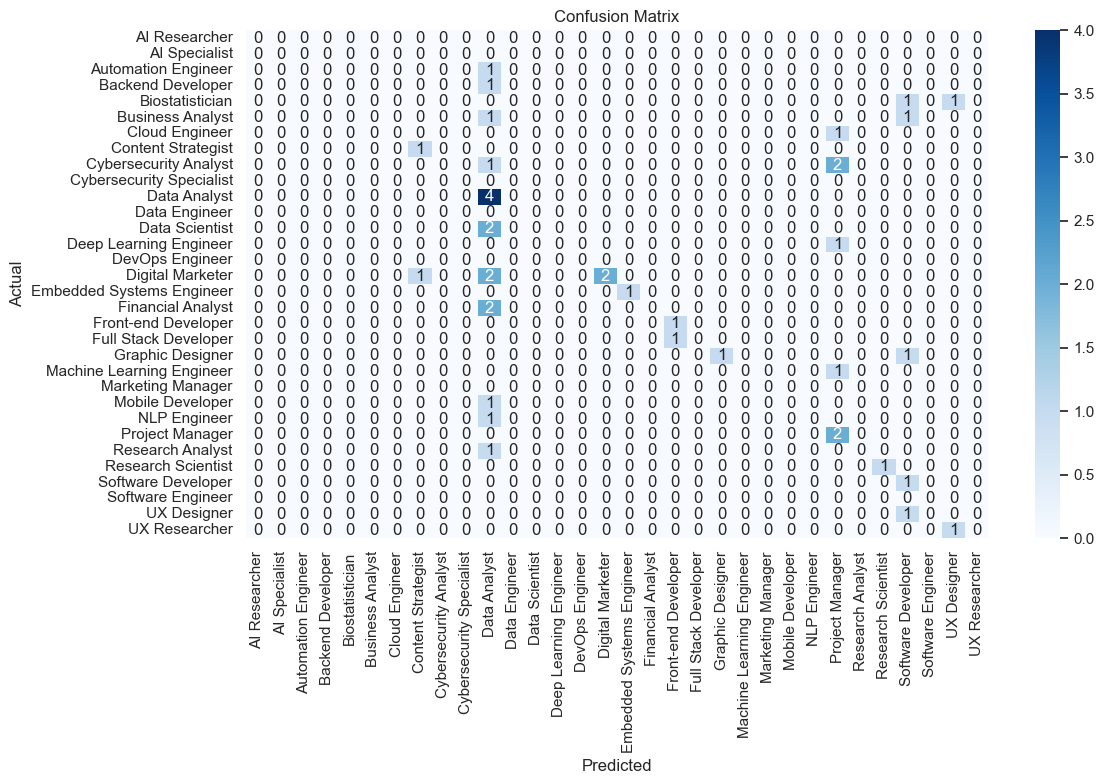

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

# Combine 'Skills' and 'Interests' into one column for training
df['combined_text'] = df['Skills'].astype(str) + ", " + df['Interests'].astype(str)

# Define features and labels
X = df['combined_text']
y = df['Recommended_Career']

# Vectorize input features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# 🧾 Show Classification Report with zero_division=0 to suppress warnings
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# ✅ Show Final Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Final Model Accuracy: {accuracy * 100:.2f}%")

# 📉 Plot Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Saving the Final Model & Vectorizer and Testing Predictions 

In [286]:
# Save the trained model
joblib.dump(model, 'final_career_model.pkl')

# Save the fitted vectorizer
joblib.dump(vectorizer, 'final_vectorizer.pkl')

print("✅ Final model and vectorizer saved successfully.")

✅ Final model and vectorizer saved successfully.


In [298]:
# Load the saved model and vectorizer
loaded_model = joblib.load('final_career_model.pkl')
loaded_vectorizer = joblib.load('final_vectorizer.pkl')

# Example: Predict from new input
sample_text = "machine learning, data sceince, AI, deep learning, python"
input_vector = loaded_vectorizer.transform([sample_text])
top5 = loaded_model.predict_proba(input_vector)[0].argsort()[-5:][::-1]
predicted_classes = loaded_model.classes_[top5]

print("🎯 Top 5 Career Predictions from Loaded Model:")
for i, career in enumerate(predicted_classes, 1):
    print(f"{i}. {career}")


🎯 Top 5 Career Predictions from Loaded Model:
1. Machine Learning Engineer
2. Data Analyst
3. UX Designer
4. Graphic Designer
5. AI Researcher


## Final Model Training + Testing (with Numerical & Text Features)

In [315]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack


In [317]:
# Load original dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

# Clean Skills and Interests
df['Skills'] = df['Skills'].str.replace('\n', '').str.strip().str.lower()
df['Interests'] = df['Interests'].str.replace('\n', '').str.strip().str.lower()

# Drop irrelevant columns
df.drop(['CandidateID', 'Age'], axis=1, inplace=True)


In [319]:
def get_programming_score(skills):
    if any(skill in skills for skill in ['python', 'java', 'c++', 'programming', 'software', 'coding']):
        return np.random.randint(8, 10)
    elif any(skill in skills for skill in ['html', 'css', 'ui/ux', 'design', 'javascript']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

def get_logical_thinking_score(skills, interests):
    keywords = ['data analysis', 'ml', 'machine learning', 'deep learning', 'analytics', 'problem solving']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['design', 'project', 'ui/ux']) or any(k in interests for k in ['business', 'marketing']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

def get_math_score(skills, interests):
    keywords = ['statistics', 'machine learning', 'mathematics', 'data science', 'algebra']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['html', 'css', 'cloud']) or any(k in interests for k in ['management']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

def get_problem_solving_score(skills, interests):
    keywords = ['problem solving', 'ml', 'ai', 'analytics', 'debugging']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['python', 'cloud', 'software']) or any(k in interests for k in ['technology']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

# Apply feature engineering
df['programming_skills'] = df['Skills'].apply(get_programming_score)
df['logical_thinking'] = df.apply(lambda row: get_logical_thinking_score(row['Skills'], row['Interests']), axis=1)
df['math_score'] = df.apply(lambda row: get_math_score(row['Skills'], row['Interests']), axis=1)
df['problem_solving'] = df.apply(lambda row: get_problem_solving_score(row['Skills'], row['Interests']), axis=1)


In [321]:
print(df.columns.tolist())
df.head()

# Optional: Save preprocessed data
df.to_csv("final_engineered_dataset.csv", index=False)


['Name', 'Education', 'Skills', 'Interests', 'Recommended_Career', 'Recommendation_Score', 'programming_skills', 'logical_thinking', 'math_score', 'problem_solving']


In [323]:
# Vectorize Skills and Interests
skills_vectorizer = TfidfVectorizer()
interests_vectorizer = TfidfVectorizer()

skills_tfidf = skills_vectorizer.fit_transform(df['Skills'])
interests_tfidf = interests_vectorizer.fit_transform(df['Interests'])

# Scale numeric features
numerical_features = df[['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']].values
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

# Combine all features
X = hstack([skills_tfidf, interests_tfidf, numerical_scaled])
y = df['Recommended_Career']


In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [327]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [329]:
y_pred = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"🎯 Final Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


📊 Classification Report:

                           precision    recall  f1-score   support

      Automation Engineer       1.00      1.00      1.00         1
        Backend Developer       1.00      1.00      1.00         1
          Biostatistician       0.00      0.00      0.00         2
         Business Analyst       1.00      0.50      0.67         2
           Cloud Engineer       0.00      0.00      0.00         1
       Content Strategist       0.00      0.00      0.00         1
    Cybersecurity Analyst       1.00      0.33      0.50         3
             Data Analyst       0.60      0.75      0.67         4
            Data Engineer       0.00      0.00      0.00         0
           Data Scientist       1.00      0.50      0.67         2
   Deep Learning Engineer       0.00      0.00      0.00         1
         Digital Marketer       1.00      0.60      0.75         5
Embedded Systems Engineer       0.50      1.00      0.67         1
        Financial Analyst       1.0

In [331]:
with open("career_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("skills_vectorizer.pkl", "wb") as f:
    pickle.dump(skills_vectorizer, f)

with open("interests_vectorizer.pkl", "wb") as f:
    pickle.dump(interests_vectorizer, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


## Final Model Prediction (with Numerical & Text Features)

In [340]:
['Name', 'Education', 'Skills', 'Interests', 
 'Recommended_Career', 'Recommendation_Score', 
 'programming_skills', 'logical_thinking', 'math_score', 'problem_solving']


['Name',
 'Education',
 'Skills',
 'Interests',
 'Recommended_Career',
 'Recommendation_Score',
 'programming_skills',
 'logical_thinking',
 'math_score',
 'problem_solving']

In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Combine text features
df['combined_text'] = df['Skills'] + ' ' + df['Interests']

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=300)
X_text = tfidf_vectorizer.fit_transform(df['combined_text'])

# Numeric features
X_numeric = df[['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Final input features
from scipy.sparse import hstack
X_final = hstack([X_text, X_scaled])

# Target variable
y = df['Recommended_Career']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [344]:
# Save the trained model and encoders
with open("career_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("✅ Model, vectorizer, and scaler saved successfully.")


✅ Model, vectorizer, and scaler saved successfully.


In [346]:
# Reload everything to verify
with open("career_model.pkl", "rb") as file:
    model = pickle.load(file)

with open("tfidf_vectorizer.pkl", "rb") as file:
    tfidf = pickle.load(file)

with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

print("✅ All components loaded. Ready for prediction!")


✅ All components loaded. Ready for prediction!


In [348]:
# Test sample input (Skills + Interests + 4 scores — out of 10)
sample_skills = "python, machine learning, statistics"
sample_interests = "data science, AI"
sample_combined_text = sample_skills + " " + sample_interests

sample_text_vec = tfidf.transform([sample_combined_text])
sample_numeric = scaler.transform([[9, 8, 9, 8]])  # All scores out of 10
sample_input = hstack([sample_text_vec, sample_numeric])

# Predict
predicted_career = model.predict(sample_input)[0]
print(f"🎯 Predicted Career: {predicted_career}")


🎯 Predicted Career: AI Specialist


In [350]:
new_user = {
    'Name': 'Sample User',
    'Education': 'Bachelor\'s',
    'Skills': sample_skills,
    'Interests': sample_interests,
    'programming_skills': 9,
    'logical_thinking': 8,
    'math_score': 9,
    'problem_solving': 8,
    'Recommended_Career': predicted_career,
    'Recommendation_Score': None  # You can compute or leave blank
}

new_user_df = pd.DataFrame([new_user])

# Append or create new CSV
csv_path = "user_predictions.csv"
try:
    existing = pd.read_csv(csv_path)
    updated = pd.concat([existing, new_user_df], ignore_index=True)
    updated.to_csv(csv_path, index=False)
except FileNotFoundError:
    new_user_df.to_csv(csv_path, index=False)

print("✅ User input and prediction saved to user_predictions.csv")


✅ User input and prediction saved to user_predictions.csv


## Final Interactive User Input + Career Roadmap Integration

In [353]:
# Load trained model
with open("career_model.pkl", "rb") as file:
    model = pickle.load(file)

# Load TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "rb") as file:
    tfidf_vectorizer = pickle.load(file)

# Load StandardScaler
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

In [355]:
def get_user_scores(skills, interests):
    def score_programming(skills):
        if any(word in skills for word in ['python', 'java', 'c++', 'programming', 'software', 'coding']):
            return 9
        return 5

    def score_logical(skills, interests):
        if 'ml' in skills or 'analytics' in interests:
            return 9
        return 5

    def score_math(skills, interests):
        if 'mathematics' in skills or 'data science' in interests:
            return 9
        return 5

    def score_problem(skills, interests):
        if 'problem solving' in skills or 'ai' in interests:
            return 9
        return 5

    return {
        "programming_skills": score_programming(skills),
        "logical_thinking": score_logical(skills, interests),
        "math_score": score_math(skills, interests),
        "problem_solving": score_problem(skills, interests),
    }


In [357]:
def predict_top_careers(name, education, skills, interests):
    input_scores = get_user_scores(skills.lower(), interests.lower())

    tfidf_input = tfidf_vectorizer.transform([skills + " " + interests])
    numerical_input = np.array([[input_scores['programming_skills'], 
                                 input_scores['logical_thinking'], 
                                 input_scores['math_score'], 
                                 input_scores['problem_solving']]])
    
    numerical_scaled = scaler.transform(numerical_input)
    full_input = hstack([tfidf_input, numerical_scaled])
    
    predicted_probs = model.predict_proba(full_input)[0]
    top5_idx = np.argsort(predicted_probs)[::-1][:5]
    top5_labels = model.classes_[top5_idx]
    
    return top5_labels, input_scores


In [429]:
def simulate_interaction(name, education, skills, interests):
    if not name.strip() or not education.strip() or not skills.strip() or not interests.strip():
        print("❌ Please enter all required details (Name, Education, Skills, Interests). Try again.")
        return

    skill_list = [s.strip() for s in skills.split(',') if s.strip()]
    interest_list = [i.strip() for i in interests.split(',') if i.strip()]

    if len(skill_list) < 1 or len(interest_list) < 2:
        print("❌ Please enter at least 1 skill and 2 interests. Try again.")
        return

    # Get top career predictions and their scores
    top_careers, scores = predict_top_careers(name, education, skills, interests)

    print("\n🎯 Based on your skills and interests, here are your recommended careers:\n")

    i = 0
    while i < len(top_careers):
        print(f"🔹 Recommended Career #{i+1}: {top_careers[i]}")
        
        # If it's the 5th (last) career
        if i == 4:
            while True:
                action = input("Choose an action - [1] Show Roadmap [3] Exit: ").strip()
                if action == '1':
                    roadmap = get_career_roadmap(top_careers[i])
                    print(f"\n📍 Roadmap for {top_careers[i]}:\n")
                    for level, steps in roadmap.items():
                        print(f"🔸 {level} Level:")
                        for step in steps:
                            print(f"   - {step}")
                    print("\n✅ You've reached the final career recommendation.")
                elif action == '3':
                    print("\n👋 Exiting. Thank you!")
                    return
                else:
                    print("❌ Invalid input. Please choose 1 or 3.")
            break

        else:
            action = input("Choose an action - [1] Show Roadmap [2] Another Career [3] Exit: ").strip()
            if action == '1':
                roadmap = get_career_roadmap(top_careers[i])
                print(f"\n📍 Roadmap for {top_careers[i]}:\n")
                for level, steps in roadmap.items():
                    print(f"🔸 {level} Level:")
                    for step in steps:
                        print(f"   - {step}")
                print("\nWhat would you like to do next?")
                while True:
                    follow_up = input("Choose - [2] Another Career [3] Exit: ").strip()
                    if follow_up == '2':
                        i += 1
                        break
                    elif follow_up == '3':
                        print("\n👋 Exiting. Thank you!")
                        return
                    else:
                        print("❌ Invalid input. Please choose 2 or 3.")
            elif action == '2':
                i += 1
            elif action == '3':
                print("\n👋 Exiting. Thank you!")
                return
            else:
                print("❌ Invalid input. Please choose 1, 2, or 3.")


In [431]:
# Define keywords for computing scores from user input
programming_keywords = ["python", "java", "c++", "programming", "software", "developer", "coding"]
logic_keywords = ["problem solving", "logic", "analytical", "reasoning", "deduction"]
math_keywords = ["mathematics", "algebra", "geometry", "calculus", "statistics", "math"]
problem_keywords = ["troubleshooting", "debugging", "problem", "resolve", "solution"]

# Define scoring function
def get_score(text, keywords):
    return sum(1 for word in keywords if word in text.lower())

In [437]:
def save_user_result(name, education, skills, interests, top_careers, scores):
    combined = skills.lower() + " " + interests.lower()

    programming_skills = get_score(combined, programming_keywords)
    logical_thinking = get_score(combined, logic_keywords)
    math_score = get_score(combined, math_keywords)
    problem_solving = get_score(combined, problem_keywords)

    # Get score values in list format
    score_values = list(scores.values()) if isinstance(scores, dict) else scores

    # Fill missing careers/scores if any
    while len(top_careers) < 5:
        top_careers.append("N/A")
    while len(score_values) < 5:
        score_values.append("N/A")

    record = {
        "Name": name,
        "Education": education,
        "Skills": skills,
        "Interests": interests,
        "Programming_Skills": programming_skills,
        "Logical_Thinking": logical_thinking,
        "Math_Score": math_score,
        "Problem_Solving": problem_solving,
        "Recommended_Career_1": top_careers[0],
        "Recommendation_Score_1": score_values[0],
        "Recommended_Career_2": top_careers[1],
        "Recommendation_Score_2": score_values[1],
        "Recommended_Career_3": top_careers[2],
        "Recommendation_Score_3": score_values[2],
        "Recommended_Career_4": top_careers[3],
        "Recommendation_Score_4": score_values[3],
        "Recommended_Career_5": top_careers[4],
        "Recommendation_Score_5": score_values[4],
    }

    try:
        df = pd.read_csv("user_predictions.csv")
        df = pd.concat([df, pd.DataFrame([record])], ignore_index=True)
    except FileNotFoundError:
        df = pd.DataFrame([record])

    df.to_csv("user_predictions.csv", index=False)
    print("\n✅ User prediction saved to 'user_predictions.csv'.")

In [2]:
name = input("Enter your name: ").strip()
education = input("Enter your highest qualification: ").strip()
skills = input("Enter your skills (comma separated): ").lower().strip()
interests = input("Enter your interests (comma separated): ").lower().strip()

top_careers, scores = predict_top_careers(name, education, skills, interests)
simulate_interaction(name, education, skills, interests)
save_user_result(name, education, skills, interests, top_careers, scores)


NameError: name 'predict_top_careers' is not defined

In [441]:
# Load and display the user prediction results
try:
    df = pd.read_csv("user_predictions.csv")
    print("📄 Saved User Predictions:\n")
    display(df.head(10))  # Show first 10 records
except FileNotFoundError:
    print("❌ 'user_predictions.csv' not found.")

📄 Saved User Predictions:



,Name,Education,Skills,Interests,programming_skills,logical_thinking,math_score,problem_solving,Recommended_Career,Recommendation_Score,...,Recommended_Career_1,Recommendation_Score_1,Recommended_Career_2,Recommendation_Score_2,Recommended_Career_3,Recommendation_Score_3,Recommended_Career_4,Recommendation_Score_4,Recommended_Career_5,Recommendation_Score_5
0,Sample User,Bachelor's,"python, machine learning, statistics","data science, AI",9.0,8.0,9.0,8.0,AI Specialist,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Talha,Bachelors,"ai, ml, math, stats","data science. ai, ml, project management",5.0,9.0,9.0,9.0,Project Manager,Top 1 of 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Talha,bachelors,"ai, ml, scrum, gile, project managemnt","data science, ai, ml, project management, scru...",5.0,9.0,9.0,9.0,Project Manager,Top 1 of 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"data science, ai, ml, project management, scru...",NaN,"data science, ai, ml, project management, scru...","data science, ai, ml, project management, scru...",5.0,9.0,9.0,9.0,Project Manager,Top 1 of 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talha,NaN,NaN,NaN,5.0,5.0,5.0,5.0,Digital Marketer,Top 1 of 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,talha,bachelors,"ai, ml, business analyst","ai, ml",NaN,NaN,NaN,NaN,NaN,NaN,...,AI Researcher,5.0,Business Analyst,9.0,Machine Learning Engineer,5.0,Digital Marketer,9.0,UX Researcher,NaN
